In [1]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('down_sample.csv')

In [4]:
df.columns = [s.strip().replace(' ','_') for s in df.columns]

In [5]:
df.shape

(47786, 22)

In [6]:
df.dtypes

,0
HeartDiseaseorAttack,int64
HighBP,int64
HighChol,int64
CholCheck,int64
BMI,int64
Smoker,int64
Stroke,int64
Diabetes,int64
PhysActivity,int64
Fruits,int64


In [7]:
df.head(3)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,1,39,0,0,1,1,1,1,0,1,0,2,0,0,0,1,8,6,8
1,1,1,1,1,26,0,0,0,1,1,1,0,1,1,4,2,0,1,0,10,4,7
2,1,1,1,1,19,1,0,0,1,1,1,0,1,0,2,0,7,0,0,11,6,5


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [10]:
df.HeartDiseaseorAttack.value_counts()

,count
HeartDiseaseorAttack,
1,23893
0,23893


In [11]:
with_heart_risk = df[df['HeartDiseaseorAttack'] == 1]
without_heart_risk = df[df['HeartDiseaseorAttack'] == 0]

In [12]:
# BMI

# Define the bins and corresponding labels
bins = [0, 18.5, 24.9, 29.9, 34.9, 40, float('inf')]
labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obesity 1', 'Obesity 2', 'Obesity 3']

# Check if 'BMI' column exists
if 'BMI' in df.columns:
    # Categorize Cholesterol levels
    df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

    # Create a new column 'Age_Numeric' with numeric representation of categories
    # Use the codes attribute to get numeric representation of the categories
    df['BMI_Numeric'] = df['BMI_Category'].cat.codes

    df=df.drop(['BMI_Category','BMI'], axis=1)
else:
    print("The 'BMI' column is not in the DataFrame.")

Explore

In [13]:
df2 = pd.get_dummies(df, drop_first=True)

In [14]:
df2.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_Numeric
count,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000
mean,0.500000,0.570021,0.547692,0.973925,0.520424,0.096116,0.473674,0.707132,0.618759,0.791257,0.047838,0.956054,0.095739,2.890135,3.859645,6.421483,0.277968,0.501277,8.975830,4.917905,5.653643,2.325388
std,0.500005,0.495078,0.497726,0.159359,0.499588,0.294753,0.836709,0.455083,0.485697,0.406415,0.213426,0.204977,0.294237,1.158120,8.298438,10.536503,0.448002,0.500004,2.907543,1.030567,2.172331,1.150381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,1.000000
50%,0.500000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,9.000000,5.000000,6.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,7.000000,1.000000,1.000000,11.000000,6.000000,8.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,5.000000


In [15]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_Numeric
count,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000
mean,0.500000,0.570021,0.547692,0.973925,0.520424,0.096116,0.473674,0.707132,0.618759,0.791257,0.047838,0.956054,0.095739,2.890135,3.859645,6.421483,0.277968,0.501277,8.975830,4.917905,5.653643,2.325388
std,0.500005,0.495078,0.497726,0.159359,0.499588,0.294753,0.836709,0.455083,0.485697,0.406415,0.213426,0.204977,0.294237,1.158120,8.298438,10.536503,0.448002,0.500004,2.907543,1.030567,2.172331,1.150381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,1.000000
50%,0.500000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,9.000000,5.000000,6.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,7.000000,1.000000,1.000000,11.000000,6.000000,8.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,5.000000


In [16]:
unique_counts_table = pd.DataFrame({
    'Variable': df.columns,
    'Unique Values Count': df.nunique()
})

# Display the table
print(unique_counts_table)

                                  Variable  Unique Values Count
HeartDiseaseorAttack  HeartDiseaseorAttack                    2
HighBP                              HighBP                    2
HighChol                          HighChol                    2
CholCheck                        CholCheck                    2
Smoker                              Smoker                    2
Stroke                              Stroke                    2
Diabetes                          Diabetes                    3
PhysActivity                  PhysActivity                    2
Fruits                              Fruits                    2
Veggies                            Veggies                    2
HvyAlcoholConsump        HvyAlcoholConsump                    2
AnyHealthcare                AnyHealthcare                    2
NoDocbcCost                    NoDocbcCost                    2
GenHlth                            GenHlth                    5
MentHlth                          MentHl

In [17]:
# Calculate skewness
skewness = df.select_dtypes(include=['float64', 'int64']).skew()

# Define a threshold for skewness (e.g., |skewness| > 1 is considered skewed)
threshold = 1

# Create a DataFrame to hold skewness and skewed status
skewness_df = pd.DataFrame({
    'Skewness': skewness,
    'Is_Skewed': skewness.apply(lambda x: 'Yes' if abs(x) > threshold else 'No')
})

# Print the skewness values and the skewed status
print("Skewness of numerical variables:")
print(skewness_df)

Skewness of numerical variables:
                      Skewness Is_Skewed
HeartDiseaseorAttack  0.000000        No
HighBP               -0.282878        No
HighChol             -0.191647        No
CholCheck            -5.948153       Yes
Smoker               -0.081768        No
Stroke                2.740602       Yes
Diabetes              1.237548       Yes
PhysActivity         -0.910341        No
Fruits               -0.489044        No
Veggies              -1.433359       Yes
HvyAlcoholConsump     4.237350       Yes
AnyHealthcare        -4.449994       Yes
NoDocbcCost           2.747977       Yes
GenHlth               0.155068        No
MentHlth              2.336729       Yes
PhysHlth              1.492429       Yes
DiffWalk              0.991248        No
Sex                  -0.005106        No
Age                  -0.646947        No
Education            -0.670350        No
Income               -0.608604        No


The proponent decided not to transform the data because most variables are binary. Only Age, Education, Income, General Health, and BMI are categorical and not skewed. On the other hand, Physical Health and Mental Health are integers and were not categorized due to the varied number of days. The proponent also intends to examine the unique values after modeling.

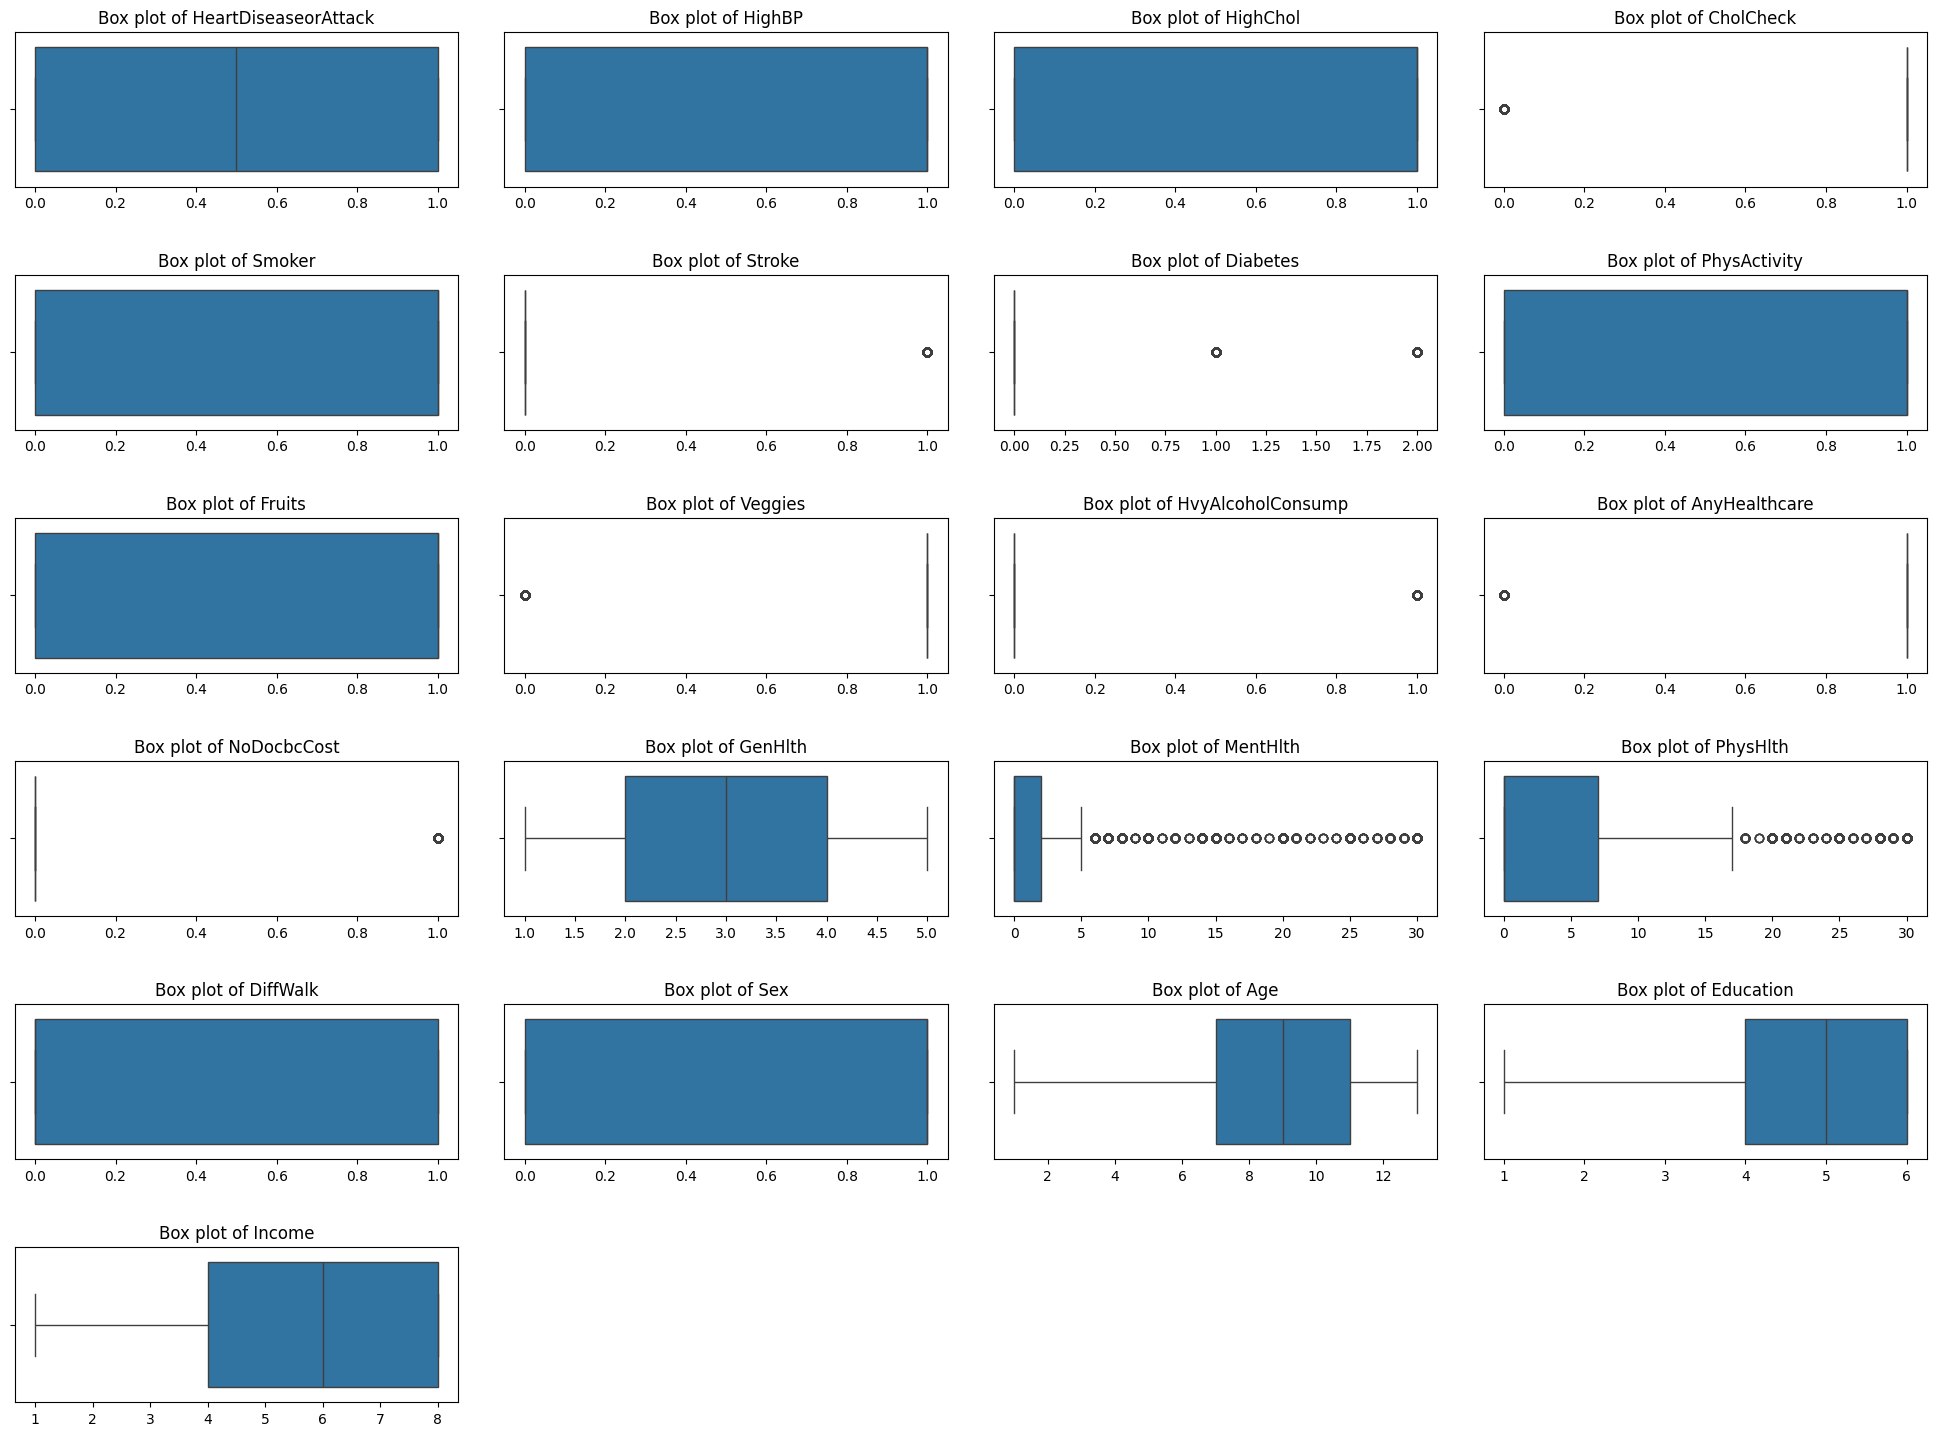

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Define the number of rows and columns for the subplots based on numeric columns
num_plots = len(numeric_df.columns)
cols = 4  # Number of columns in the subplot grid
rows = math.ceil(num_plots / cols)  # Calculate the number of rows needed

plt.figure(figsize=(20, 15))  # Increase the figure size for better readability

# Iterate and plot only numeric columns
for i, variable in enumerate(numeric_df.columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=numeric_df[variable])
    plt.title(f'Box plot of {variable}', fontsize=12)
    plt.xlabel('')  # Remove x-axis label for clarity

plt.tight_layout(pad=3.0)  # Adjust spacing between plots
plt.show()

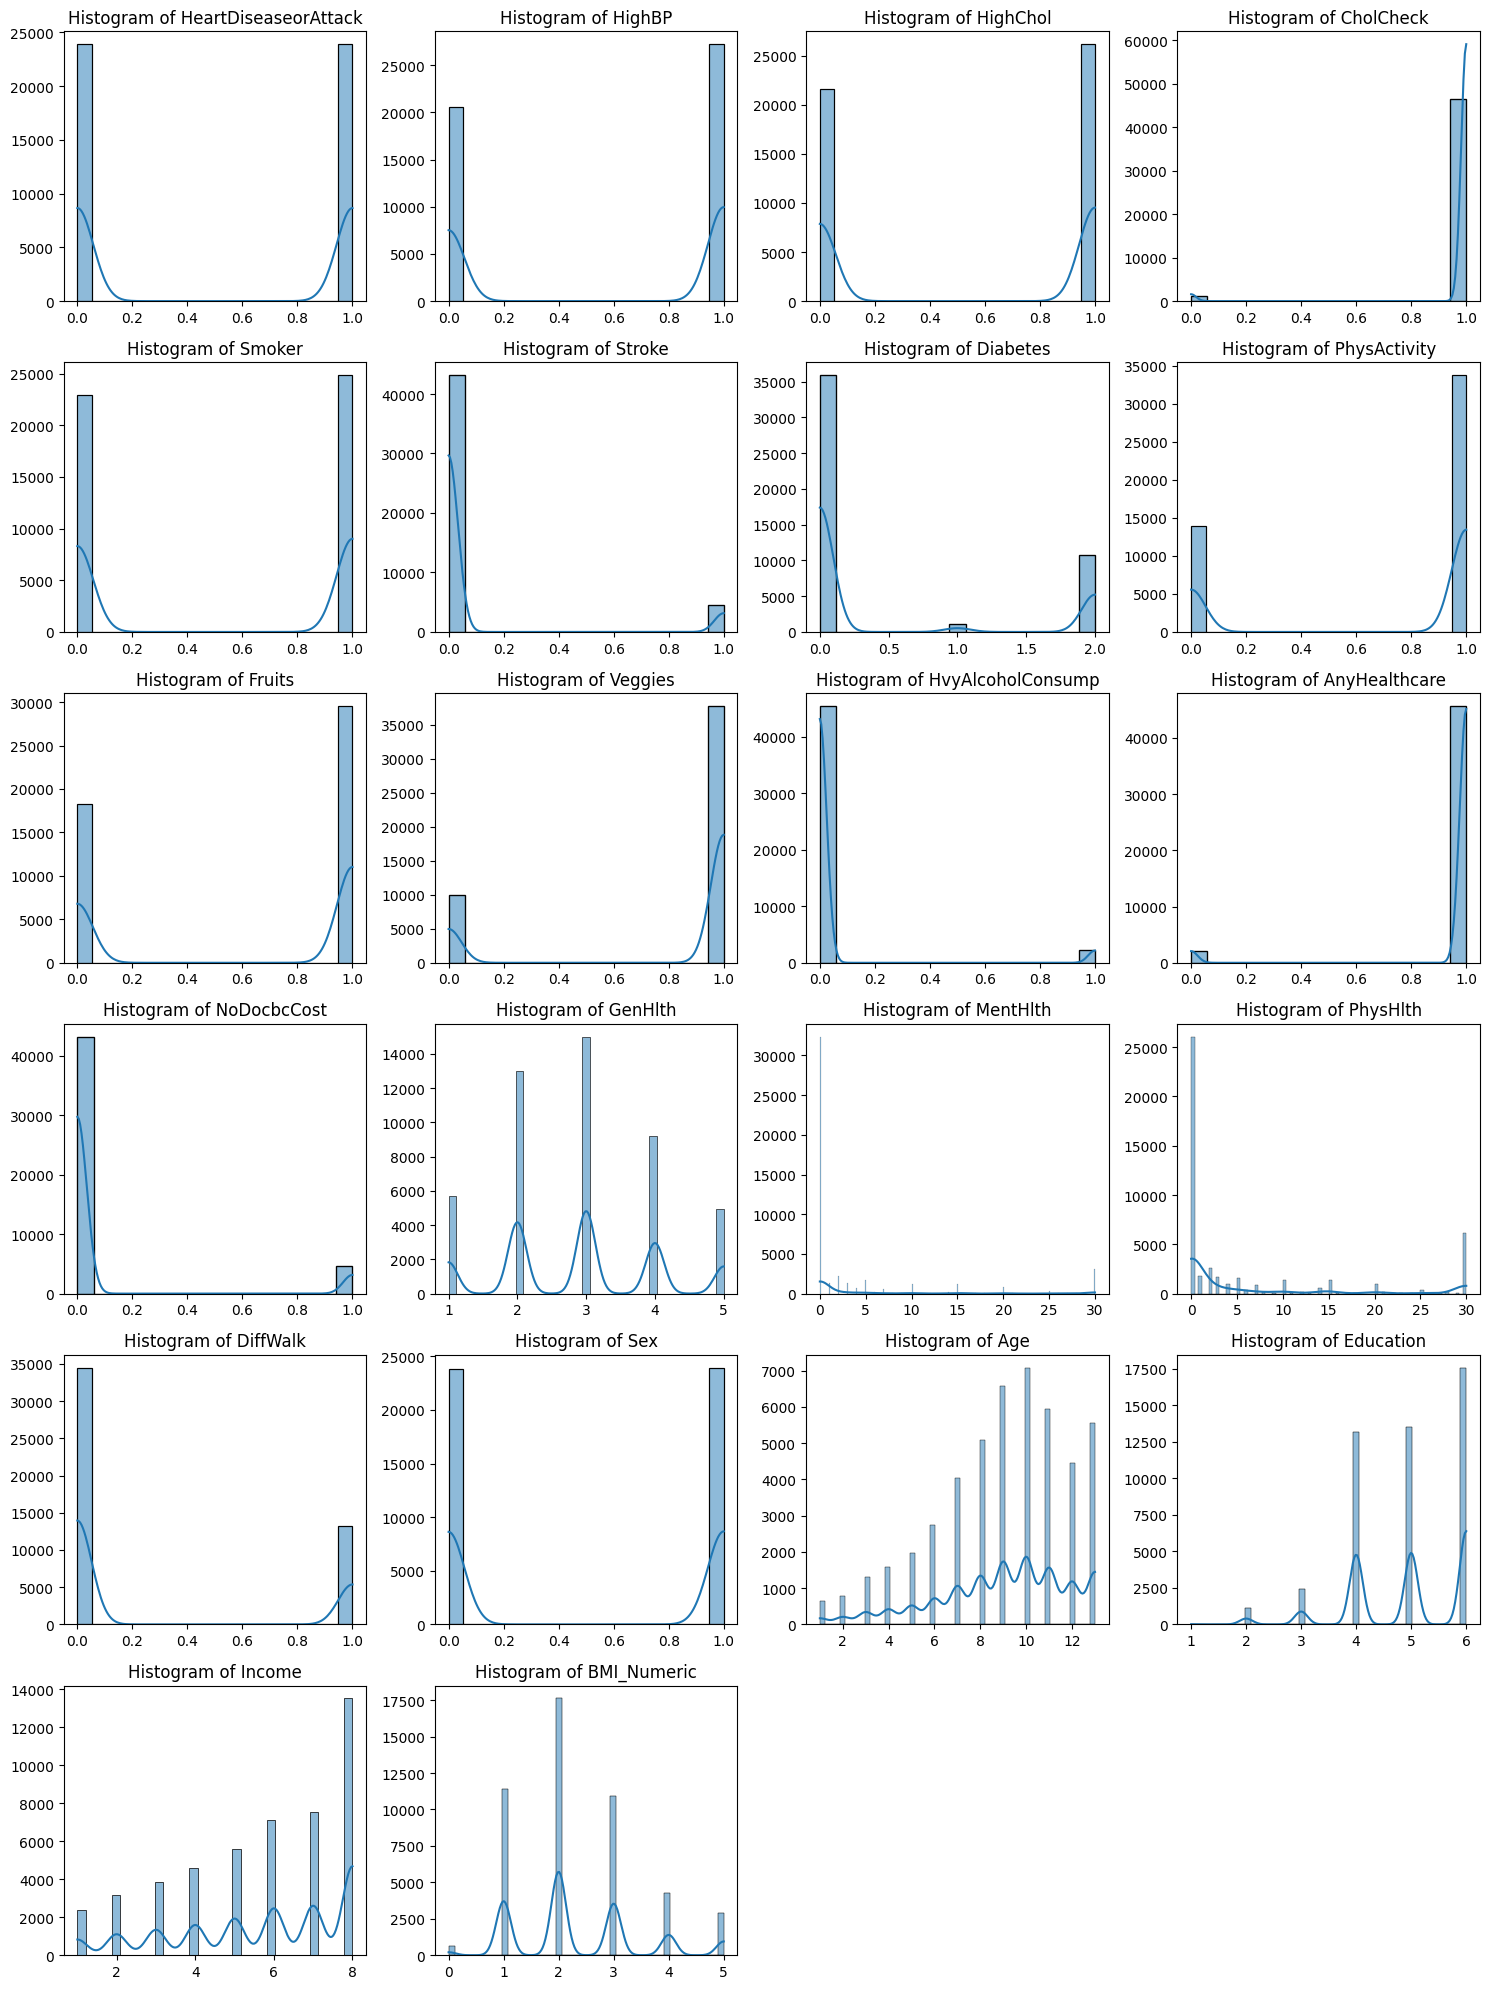

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows and columns for the subplots based on the number of variables
num_plots = len(df.columns)
cols = 4  # Number of columns in the subplot grid
rows = math.ceil(num_plots / cols)  # Calculate the number of rows needed

plt.figure(figsize=(15, 20))  # Adjust figure size as needed

# Iterate over the variables and create subplots
for i, variable in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)  # Use calculated rows for subplot placement
    sns.histplot(df[variable], kde=True)
    plt.title(f'Histogram of {variable}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

Heatmap

In [20]:
# Calculate the correlation matrix
corr = df.corr()

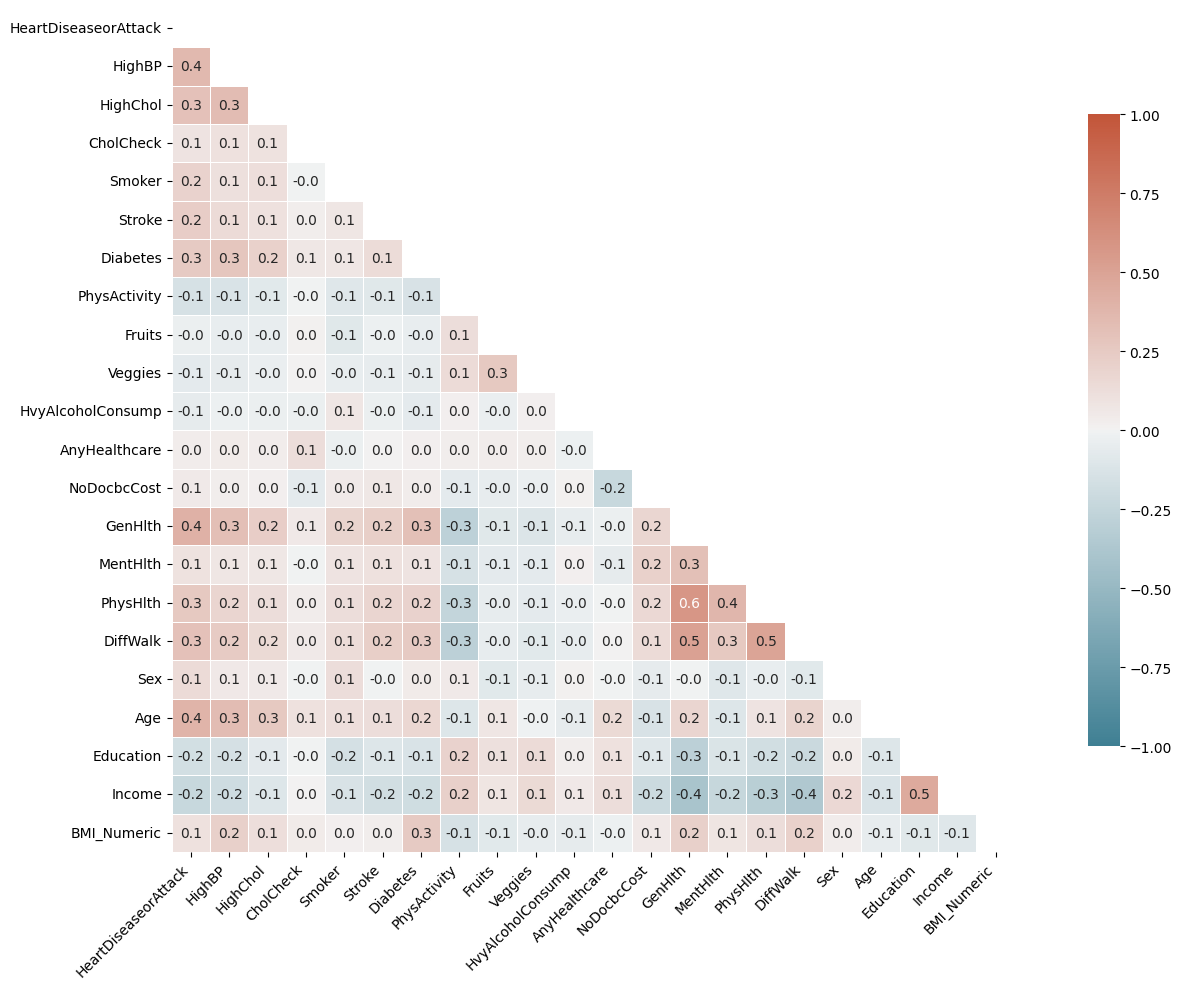

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the figure size
plt.figure(figsize=(15, 10))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .75}, annot_kws={"size": 10})

# Rotate the x and y axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [22]:
import numpy as np  # Import NumPy library
# Filter the correlation matrix to show only values greater than 0.5
filtered_corr = corr[(corr > 0.7) | (corr < -0.7)]

# Optional: Set diagonal to NaN to avoid showing perfect correlation with itself
np.fill_diagonal(filtered_corr.values, np.nan)

# Display the filtered correlation matrix
print(filtered_corr)

                      HeartDiseaseorAttack  HighBP  HighChol  CholCheck  \
HeartDiseaseorAttack                   NaN     NaN       NaN        NaN   
HighBP                                 NaN     NaN       NaN        NaN   
HighChol                               NaN     NaN       NaN        NaN   
CholCheck                              NaN     NaN       NaN        NaN   
Smoker                                 NaN     NaN       NaN        NaN   
Stroke                                 NaN     NaN       NaN        NaN   
Diabetes                               NaN     NaN       NaN        NaN   
PhysActivity                           NaN     NaN       NaN        NaN   
Fruits                                 NaN     NaN       NaN        NaN   
Veggies                                NaN     NaN       NaN        NaN   
HvyAlcoholConsump                      NaN     NaN       NaN        NaN   
AnyHealthcare                          NaN     NaN       NaN        NaN   
NoDocbcCost              

# Models

Random Forest

In [23]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
!pip install dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

!pip install scikit-learn pandas
from sklearn.preprocessing import OneHotEncoder


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 4.0 MB/s eta 0:00:00
Colab environment detected.


In [24]:
excluded_columns = ['HeartDiseaseorAttack']  # Create a list containing the column to exclude
outcome = 'HeartDiseaseorAttack'
predictors = [s for s in df.columns if s not in excluded_columns] # Now this should work

In [25]:
X = df[predictors]
y = df[outcome]


In [26]:
train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size=0.4,random_state=1)

In [27]:
train_X.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_Numeric
33700,1,0,1,0,0,1,1,1,1,0,1,0,2,0,1,0,1,11,5,6,2
9861,0,1,1,1,0,2,1,1,1,0,1,0,4,0,0,0,0,10,4,7,1
17508,1,1,1,0,0,2,0,1,0,0,1,1,4,20,25,1,0,9,5,2,2
19938,1,1,1,0,0,2,1,1,1,0,1,0,3,0,0,0,0,12,5,4,1
28116,0,0,1,1,0,0,1,1,1,0,1,0,2,1,0,0,0,10,6,7,2


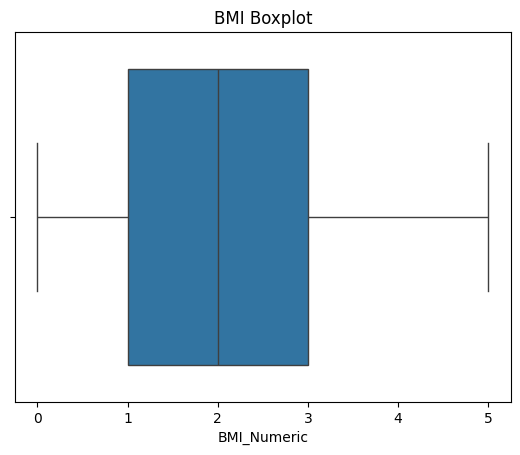

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the specific column you want to plot
sns.boxplot(x=X['BMI_Numeric'])

# Add title and labels
plt.title('BMI Boxplot')
plt.xlabel('BMI_Numeric')

# Show the plot
plt.show()

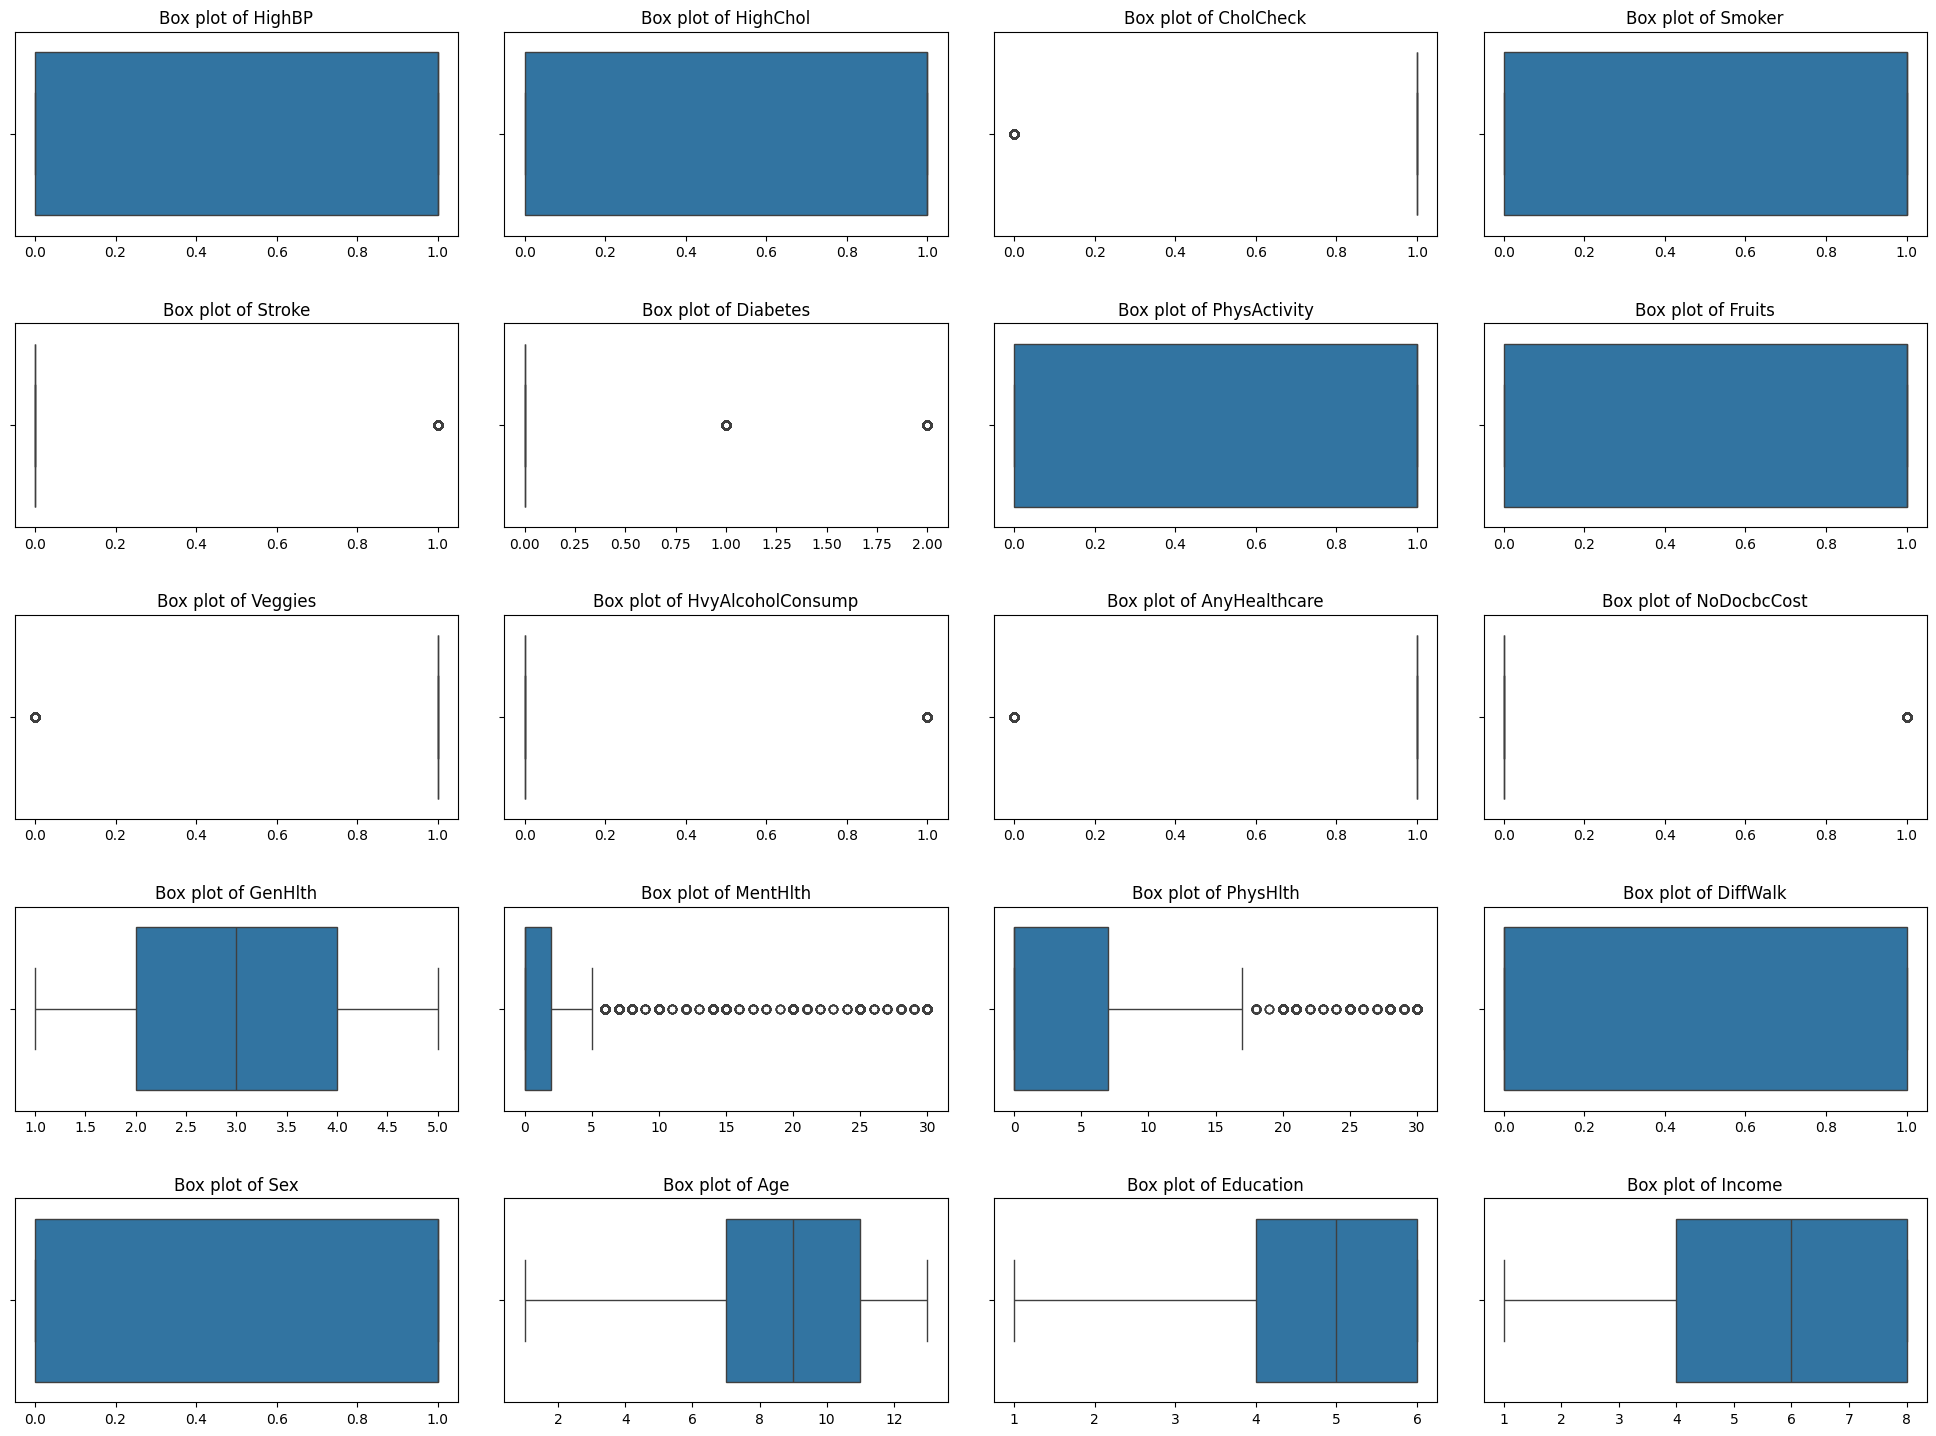

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select only numeric columns
numeric_df = X.select_dtypes(include=['float64', 'int64'])

# Define the number of rows and columns for the subplots based on numeric columns
num_plots = len(numeric_df.columns)
cols = 4  # Number of columns in the subplot grid
rows = math.ceil(num_plots / cols)  # Calculate the number of rows needed

plt.figure(figsize=(20, 15))  # Increase the figure size for better readability

# Iterate and plot only numeric columns
for i, variable in enumerate(numeric_df.columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=numeric_df[variable])
    plt.title(f'Box plot of {variable}', fontsize=12)
    plt.xlabel('')  # Remove x-axis label for clarity

plt.tight_layout(pad=3.0)  # Adjust spacing between plots
plt.show()

In [30]:
rf = RandomForestClassifier(random_state=1, n_estimators=500)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [31]:
rf.feature_importances_

array([0.06471461, 0.04628872, 0.00455504, 0.02657149, 0.0262095 ,
       0.03208091, 0.02441574, 0.02954362, 0.02267028, 0.00963659,
       0.0075033 , 0.0121804 , 0.10513101, 0.05245014, 0.07579029,
       0.03932645, 0.03260347, 0.16429216, 0.06023516, 0.09095938,
       0.07284174])

              feature  importance       std
17                Age    0.164292  0.022443
12            GenHlth    0.105131  0.034418
19             Income    0.090959  0.006581
14           PhysHlth    0.075790  0.014060
20        BMI_Numeric    0.072842  0.004563
0              HighBP    0.064715  0.038310
18          Education    0.060235  0.004254
13           MentHlth    0.052450  0.003021
1            HighChol    0.046289  0.021898
15           DiffWalk    0.039326  0.026379
16                Sex    0.032603  0.004288
5            Diabetes    0.032081  0.010827
7              Fruits    0.029544  0.002372
3              Smoker    0.026571  0.004276
4              Stroke    0.026209  0.008421
6        PhysActivity    0.024416  0.003326
8             Veggies    0.022670  0.002516
11        NoDocbcCost    0.012180  0.001298
9   HvyAlcoholConsump    0.009637  0.001235
10      AnyHealthcare    0.007503  0.000976
2           CholCheck    0.004555  0.000792


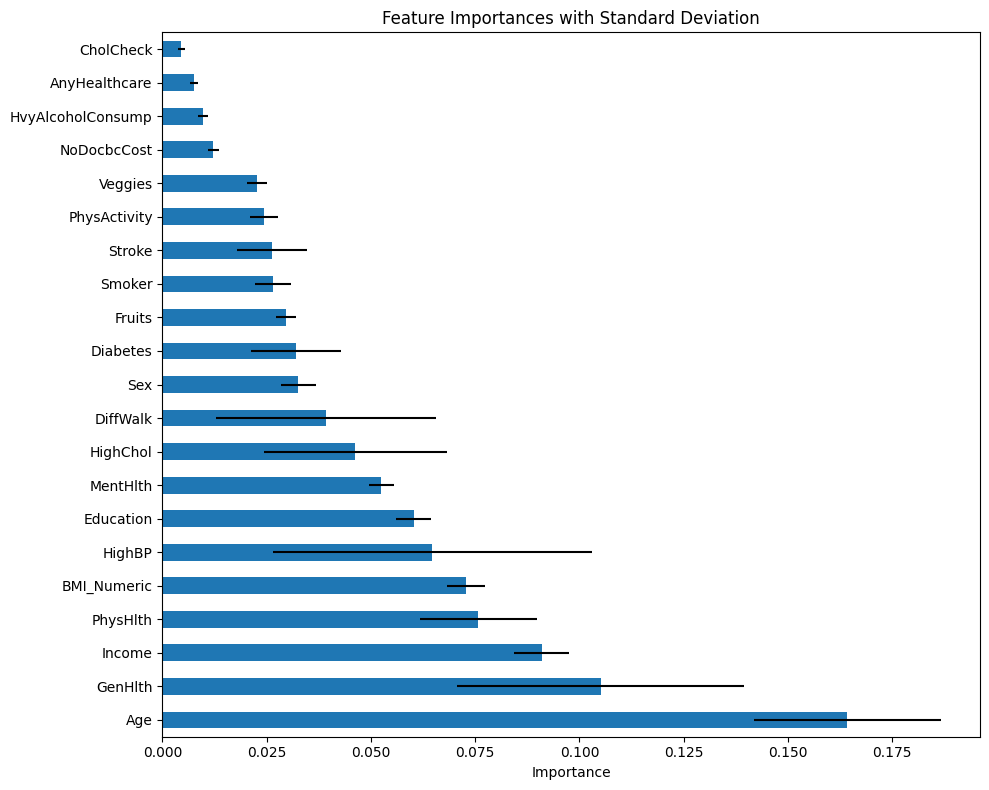

In [32]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# Use the original train_X DataFrame to get the column names
df1 = pd.DataFrame({'feature': X.columns, 'importance': importances, 'std': std})
df1 = df1.sort_values('importance', ascending=False)
print(df1)

ax = df1.plot(kind='barh', xerr='std', x='feature', legend=False, figsize=(10, 8))
ax.set_ylabel('')
ax.set_xlabel('Importance')
ax.set_title('Feature Importances with Standard Deviation')

plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Define your models here
models = {
    "RandomForest": RandomForestClassifier(random_state=1, n_estimators=500),
    # Add more models here as you train them
}


In [34]:
# Create a list to store model performance
model_performance = []


In [35]:
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")

    # Fit the model on the training data
    model.fit(train_X, train_y)

    # Make predictions on the validation data
    y_pred = model.predict(valid_X)
    y_proba = model.predict_proba(valid_X)[:, 1]  # Probability estimates for ROC AUC

    # Calculate performance metrics
    roc_auc = roc_auc_score(valid_y, y_proba)
    accuracy = accuracy_score(valid_y, y_pred)
    recall = recall_score(valid_y, y_pred) #pos_label='like')
    precision = precision_score(valid_y, y_pred) #pos_label='like')
    f1 = f1_score(valid_y, y_pred) #pos_label='like')

    # Append the metrics to the list
    model_performance.append({
        "Model Name": model_name,
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    })

Evaluating model: RandomForest


In [36]:
df_model_performance = pd.DataFrame(model_performance)
print("Model Comparison:")
print(df_model_performance.to_string(index=False))

Model Comparison:
  Model Name  ROC AUC  Accuracy   Recall  Precision  F1 Score
RandomForest 0.828264  0.758724 0.797154   0.742694  0.768961


Full Class Tree

In [37]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_Numeric
0,1,1,1,1,0,0,1,1,1,1,0,1,0,2,0,0,0,1,8,6,8,4
1,1,1,1,1,0,0,0,1,1,1,0,1,1,4,2,0,1,0,10,4,7,2
2,1,1,1,1,1,0,0,1,1,1,0,1,0,2,0,7,0,0,11,6,5,1
3,1,1,1,1,1,0,2,0,0,0,0,1,0,5,0,30,1,1,10,6,7,4
4,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,0,1,1,11,5,8,3


In [38]:
random_significant_columns = ['Age', 'GenHlth', 'Income', 'PhysHlth', 'BMI_Numeric', 'HighBP', 'Education', 'MentHlth', 'HighChol','HeartDiseaseorAttack']
random_significant_df = df[random_significant_columns]

excluded_columns = ['HeartDiseaseorAttack']  # Create a list containing the column to exclude
outcome = 'HeartDiseaseorAttack'
predictors = [s for s in random_significant_df.columns if s not in excluded_columns] # Now this should work

X = random_significant_df[predictors]
y = random_significant_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size=0.4,random_state=1)

In [39]:
fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(train_X, train_y)

DecisionTreeClassifier(random_state=1)

In [40]:
#plotDecisionTree(fullClassTree, feature_names=train_X.columns)
#plt.show()
# RUN AT LAST PART

In [41]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9324)

       Prediction
Actual     0     1
     0 13789   617
     1  1322 12943
Confusion Matrix (Accuracy 0.6595)

       Prediction
Actual    0    1
     0 6548 2939
     1 3569 6059


In [42]:
model_performance.clear()  # This empties the list but keeps the variable intact

In [43]:
model_performance = []  # This re-creates the list, effectively starting from scratch

In [44]:
models.update({
    "RandomForest": RandomForestClassifier(random_state=1, n_estimators=500),
    "FullClassTree": DecisionTreeClassifier(random_state=1)
    # Add any more models here
})

In [45]:
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")

    # Fit the model on the training data
    model.fit(train_X, train_y)

    # Make predictions on the validation data
    y_pred = model.predict(valid_X)
    y_proba = model.predict_proba(valid_X)[:, 1]  # Probability estimates for ROC AUC

    # Calculate performance metrics
    roc_auc = roc_auc_score(valid_y, y_proba)
    accuracy = accuracy_score(valid_y, y_pred)
    recall = recall_score(valid_y, y_pred) #pos_label='like')
    precision = precision_score(valid_y, y_pred) #pos_label='like')
    f1 = f1_score(valid_y, y_pred) #pos_label='like')

    # Append the metrics to the list
    model_performance.append({
        "Model Name": model_name,
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    })

Evaluating model: RandomForest
Evaluating model: FullClassTree


In [46]:
df_model_performance = pd.DataFrame(model_performance)
print("Updated Model Comparison:")
print(df_model_performance.to_string(index=False))

Updated Model Comparison:
   Model Name  ROC AUC  Accuracy   Recall  Precision  F1 Score
 RandomForest 0.779381  0.718022 0.747819   0.708522  0.727640
FullClassTree 0.667245  0.659534 0.629310   0.673372  0.650596


Decision Trees

In [47]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Initialize and train the classifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier()

In [49]:
y_pred = clf.predict(valid_X)

In [50]:
report = classification_report(valid_y, y_pred, target_names=['No Heart Disease', 'Heart Disease'])
print(report)

                  precision    recall  f1-score   support

No Heart Disease       0.65      0.69      0.67      9487
   Heart Disease       0.67      0.63      0.65      9628

        accuracy                           0.66     19115
       macro avg       0.66      0.66      0.66     19115
    weighted avg       0.66      0.66      0.66     19115



In [51]:
model_performance.clear()  # This empties the list but keeps the variable intact
model_performance = []  # This re-creates the list, effectively starting from scratch

In [52]:
models.update({
    "RandomForest": RandomForestClassifier(random_state=1, n_estimators=500),
    "FullClassTree": DecisionTreeClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier()

    # Add any more models here
})

In [53]:
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")

    # Fit the model on the training data
    model.fit(train_X, train_y)

    # Make predictions on the validation data
    y_pred = model.predict(valid_X)
    y_proba = model.predict_proba(valid_X)[:, 1]  # Probability estimates for ROC AUC

    # Calculate performance metrics
    roc_auc = roc_auc_score(valid_y, y_proba)
    accuracy = accuracy_score(valid_y, y_pred)
    recall = recall_score(valid_y, y_pred) #pos_label='like')
    precision = precision_score(valid_y, y_pred) #pos_label='like')
    f1 = f1_score(valid_y, y_pred) #pos_label='like')

    # Append the metrics to the list
    model_performance.append({
        "Model Name": model_name,
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    })

Evaluating model: RandomForest
Evaluating model: FullClassTree
Evaluating model: DecisionTree


In [54]:
df_model_performance = pd.DataFrame(model_performance)
print("Updated Model Comparison:")
print(df_model_performance.to_string(index=False))

Updated Model Comparison:
   Model Name  ROC AUC  Accuracy   Recall  Precision  F1 Score
 RandomForest 0.779381  0.718022 0.747819   0.708522  0.727640
FullClassTree 0.667245  0.659534 0.629310   0.673372  0.650596
 DecisionTree 0.669126  0.660685 0.631699   0.674130  0.652225


Small Class Tree

In [55]:
smallClassTree = DecisionTreeClassifier(random_state=1, max_depth=2)
smallClassTree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=2, random_state=1)

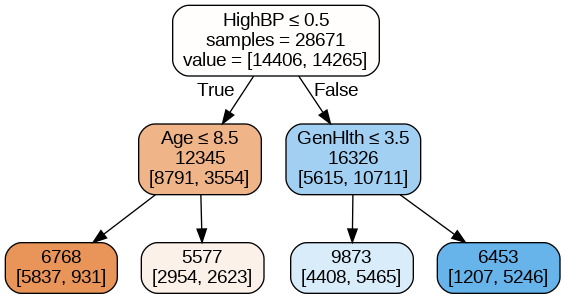

In [56]:
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [57]:
classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))


Confusion Matrix (Accuracy 0.6802)

       Prediction
Actual     0     1
     0  8791  5615
     1  3554 10711
Confusion Matrix (Accuracy 0.6805)

       Prediction
Actual    0    1
     0 5791 3696
     1 2411 7217


In [58]:
model_performance.clear()  # This empties the list but keeps the variable intact
model_performance = []  # This re-creates the list, effectively starting from scratch

In [59]:
models.update({
    "RandomForest": RandomForestClassifier(random_state=1, n_estimators=500),
    "FullClassTree": DecisionTreeClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SmallClassTree": DecisionTreeClassifier(random_state=1, max_depth=2)
    # Add any more models here
})

In [60]:
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")

    # Fit the model on the training data
    model.fit(train_X, train_y)

    # Make predictions on the validation data
    y_pred = model.predict(valid_X)
    y_proba = model.predict_proba(valid_X)[:, 1]  # Probability estimates for ROC AUC

    # Calculate performance metrics
    roc_auc = roc_auc_score(valid_y, y_proba)
    accuracy = accuracy_score(valid_y, y_pred)
    recall = recall_score(valid_y, y_pred) #pos_label='like')
    precision = precision_score(valid_y, y_pred) #pos_label='like')
    f1 = f1_score(valid_y, y_pred) #pos_label='like')

    # Append the metrics to the list
    model_performance.append({
        "Model Name": model_name,
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    })

Evaluating model: RandomForest
Evaluating model: FullClassTree
Evaluating model: DecisionTree
Evaluating model: SmallClassTree


In [61]:
df_model_performance = pd.DataFrame(model_performance)
print("Updated Model Comparison:")
print(df_model_performance.to_string(index=False))

Updated Model Comparison:
    Model Name  ROC AUC  Accuracy   Recall  Precision  F1 Score
  RandomForest 0.779381  0.718022 0.747819   0.708522  0.727640
 FullClassTree 0.667245  0.659534 0.629310   0.673372  0.650596
  DecisionTree 0.667105  0.659482 0.628376   0.673644  0.650223
SmallClassTree 0.747896  0.680513 0.749585   0.661321  0.702692


Small Class Tree 3

In [62]:
smallClassTree3 = DecisionTreeClassifier(random_state=1, max_depth=3)
smallClassTree3.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=3, random_state=1)

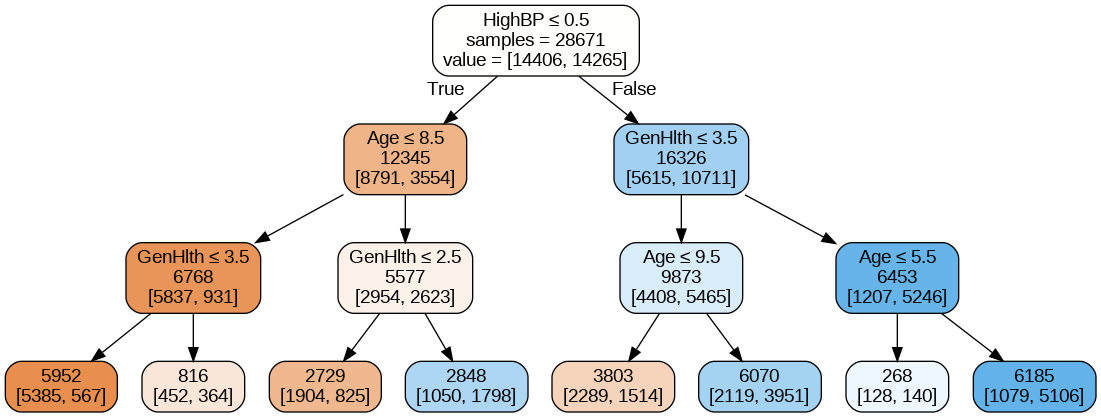

In [63]:
plotDecisionTree(smallClassTree3, feature_names=train_X.columns)

In [64]:
classificationSummary(train_y, smallClassTree3.predict(train_X))
classificationSummary(valid_y, smallClassTree3.predict(valid_X))


Confusion Matrix (Accuracy 0.7333)

       Prediction
Actual     0     1
     0 10030  4376
     1  3270 10995
Confusion Matrix (Accuracy 0.7294)

       Prediction
Actual    0    1
     0 6574 2913
     1 2260 7368


In [65]:
model_performance.clear()  # This empties the list but keeps the variable intact
model_performance = []  # This re-creates the list, effectively starting from scratch

In [66]:
models.update({
    "RandomForest": RandomForestClassifier(random_state=1, n_estimators=500),
    "FullClassTree": DecisionTreeClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SmallClassTree": DecisionTreeClassifier(random_state=1, max_depth=2),
    "SmallClassTree3": DecisionTreeClassifier(random_state=1, max_depth=3)
    # Add any more models here
})

In [67]:
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")

    # Fit the model on the training data
    model.fit(train_X, train_y)

    # Make predictions on the validation data
    y_pred = model.predict(valid_X)
    y_proba = model.predict_proba(valid_X)[:, 1]  # Probability estimates for ROC AUC

    # Calculate performance metrics
    roc_auc = roc_auc_score(valid_y, y_proba)
    accuracy = accuracy_score(valid_y, y_pred)
    recall = recall_score(valid_y, y_pred) #pos_label='like')
    precision = precision_score(valid_y, y_pred) #pos_label='like')
    f1 = f1_score(valid_y, y_pred) #pos_label='like')

    # Append the metrics to the list
    model_performance.append({
        "Model Name": model_name,
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    })

Evaluating model: RandomForest
Evaluating model: FullClassTree
Evaluating model: DecisionTree
Evaluating model: SmallClassTree
Evaluating model: SmallClassTree3


In [68]:
df_model_performance = pd.DataFrame(model_performance)
print("Updated Model Comparison:")
print(df_model_performance.to_string(index=False))

Updated Model Comparison:
     Model Name  ROC AUC  Accuracy   Recall  Precision  F1 Score
   RandomForest 0.779381  0.718022 0.747819   0.708522  0.727640
  FullClassTree 0.667245  0.659534 0.629310   0.673372  0.650596
   DecisionTree 0.667105  0.659482 0.628376   0.673644  0.650223
 SmallClassTree 0.747896  0.680513 0.749585   0.661321  0.702692
SmallClassTree3 0.787628  0.729375 0.765268   0.716662  0.740168


Small Class Tree 5

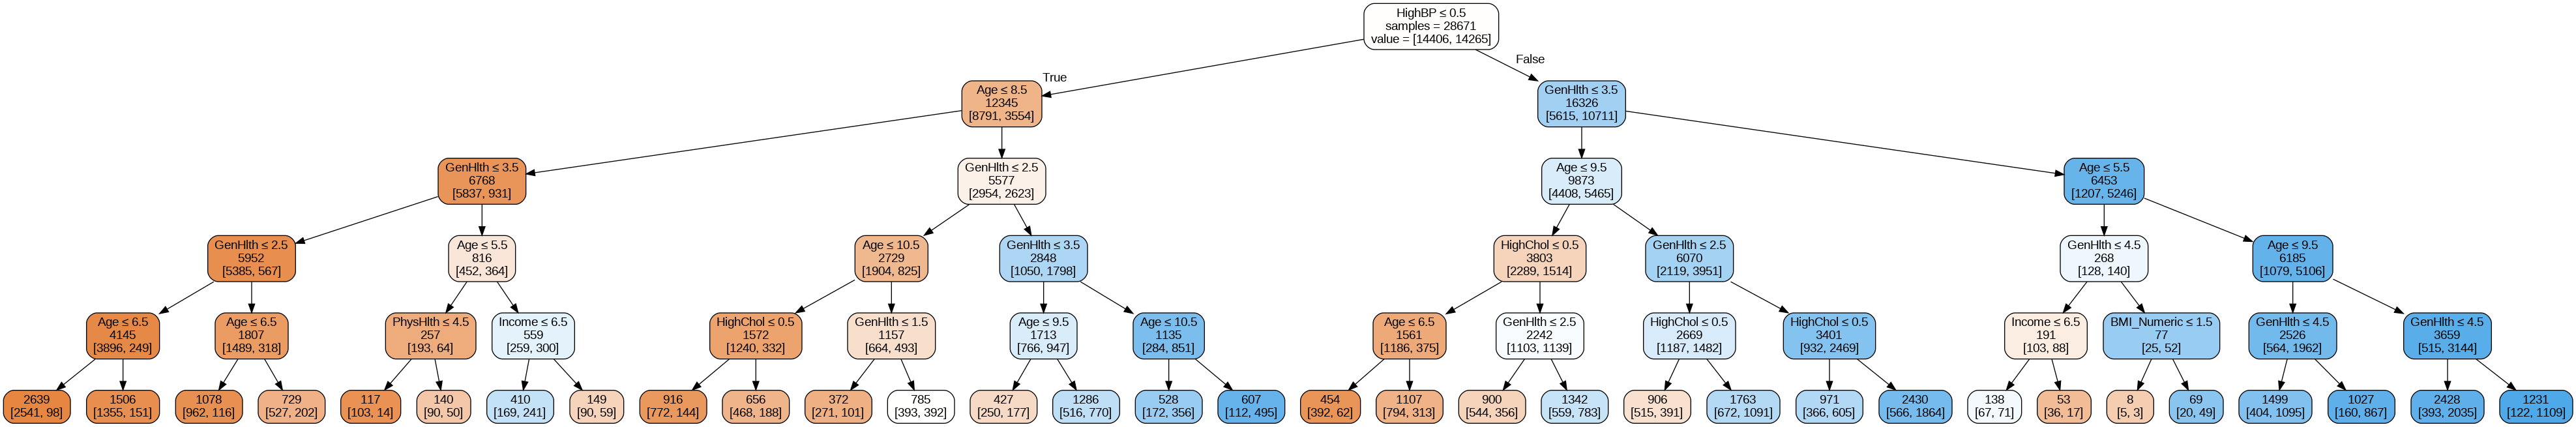

In [69]:
smallClassTree5 = DecisionTreeClassifier(random_state=1, max_depth=5, min_impurity_decrease=0.00)
smallClassTree5.fit(train_X, train_y)
plotDecisionTree(smallClassTree5, feature_names=train_X.columns)

In [70]:
classificationSummary(train_y, smallClassTree5.predict(train_X))
classificationSummary(valid_y, smallClassTree5.predict(valid_X))


Confusion Matrix (Accuracy 0.7512)

       Prediction
Actual     0     1
     0 10108  4298
     1  2834 11431
Confusion Matrix (Accuracy 0.7445)

       Prediction
Actual    0    1
     0 6541 2946
     1 1937 7691


In [71]:
model_performance.clear()  # This empties the list but keeps the variable intact
model_performance = []  # This re-creates the list, effectively starting from scratch

In [72]:
models.update({
    "RandomForest": RandomForestClassifier(random_state=1, n_estimators=500),
    "FullClassTree": DecisionTreeClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SmallClassTree": DecisionTreeClassifier(random_state=1, max_depth=2),
    "SmallClassTree3": DecisionTreeClassifier(random_state=1, max_depth=3),
    "SmallClassTree5": DecisionTreeClassifier(random_state=1, max_depth=5, min_impurity_decrease=0.00)
    # Add any more models here
})

In [73]:
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")

    # Fit the model on the training data
    model.fit(train_X, train_y)

    # Make predictions on the validation data
    y_pred = model.predict(valid_X)
    y_proba = model.predict_proba(valid_X)[:, 1]  # Probability estimates for ROC AUC

    # Calculate performance metrics
    roc_auc = roc_auc_score(valid_y, y_proba)
    accuracy = accuracy_score(valid_y, y_pred)
    recall = recall_score(valid_y, y_pred) #pos_label='like')
    precision = precision_score(valid_y, y_pred) #pos_label='like')
    f1 = f1_score(valid_y, y_pred) #pos_label='like')

    # Append the metrics to the list
    model_performance.append({
        "Model Name": model_name,
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    })

Evaluating model: RandomForest
Evaluating model: FullClassTree
Evaluating model: DecisionTree
Evaluating model: SmallClassTree
Evaluating model: SmallClassTree3
Evaluating model: SmallClassTree5


In [74]:
df_model_performance = pd.DataFrame(model_performance)
print("Updated Model Comparison:")
print(df_model_performance.to_string(index=False))

Updated Model Comparison:
     Model Name  ROC AUC  Accuracy   Recall  Precision  F1 Score
   RandomForest 0.779381  0.718022 0.747819   0.708522  0.727640
  FullClassTree 0.667245  0.659534 0.629310   0.673372  0.650596
   DecisionTree 0.667105  0.659482 0.628376   0.673644  0.650223
 SmallClassTree 0.747896  0.680513 0.749585   0.661321  0.702692
SmallClassTree3 0.787628  0.729375 0.765268   0.716662  0.740168
SmallClassTree5 0.813412  0.744546 0.798816   0.723042  0.759043


Cross Validation with Grid Search





In [75]:
param_grid = {'max_depth' : [2, 3, 5, 10],
              'min_samples_split' : [0.07, 0.005],
              'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001]}

In [76]:
gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=1),param_grid, cv=5, n_jobs=1)
gridsearch.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001],
                         'min_samples_split': [0.07, 0.005]})

In [77]:
gridsearch.best_score_

0.7476892662772024

In [78]:
gridsearch.best_params_

{'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 0.005}

In [79]:
gridClassTree = DecisionTreeClassifier(random_state=1, max_depth = 5,
                                       min_impurity_decrease=0.001, min_samples_split= 0.005)

In [80]:
gridClassTree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.001,
                       min_samples_split=0.005, random_state=1)

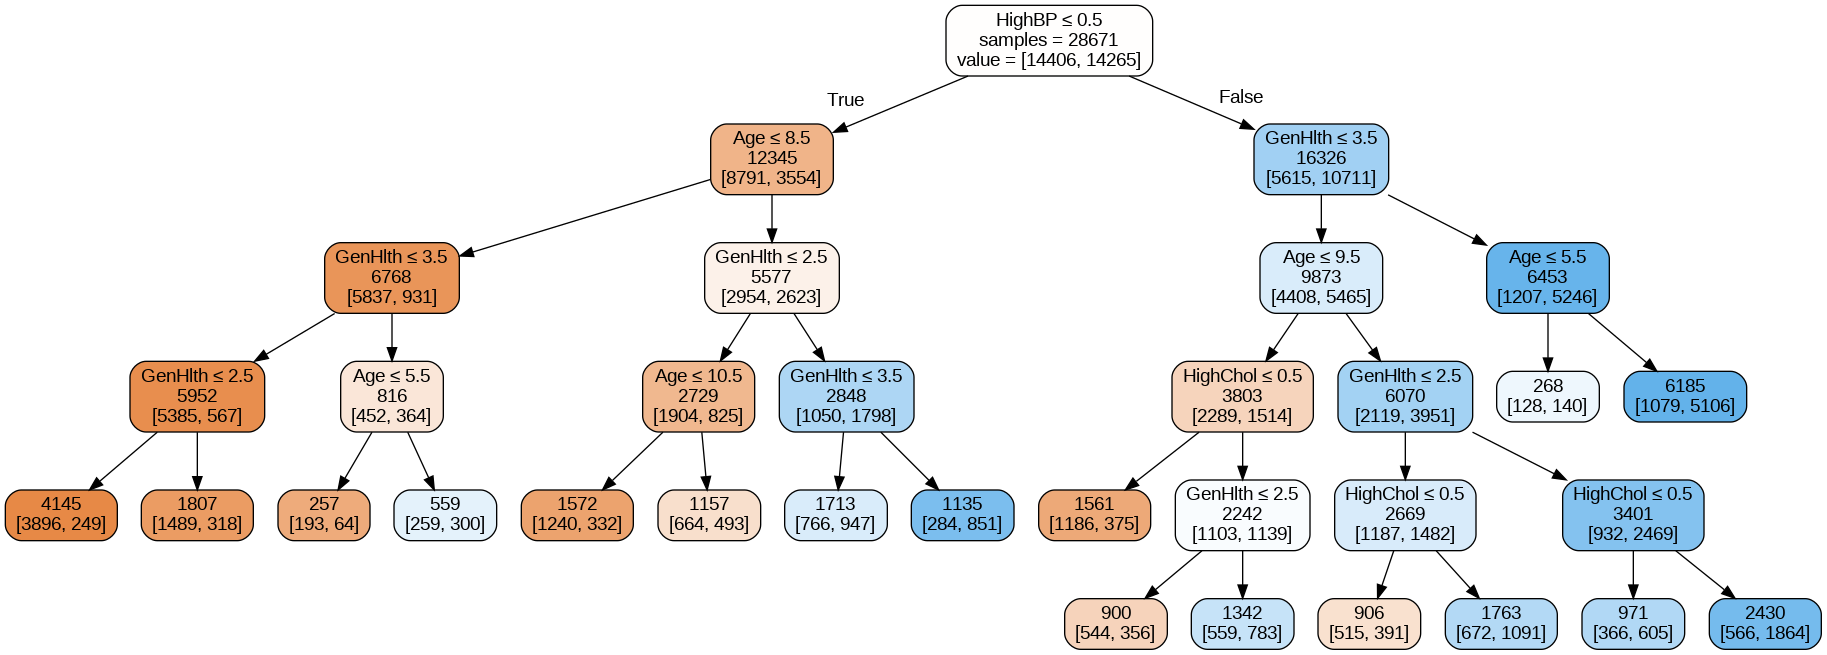

In [81]:
plotDecisionTree(gridClassTree, feature_names=train_X.columns)

In [82]:
classificationSummary(train_y, gridClassTree.predict(train_X))
classificationSummary(valid_y, gridClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.7469)

       Prediction
Actual     0     1
     0  9727  4679
     1  2578 11687
Confusion Matrix (Accuracy 0.7425)

       Prediction
Actual    0    1
     0 6320 3167
     1 1755 7873


In [83]:
model_performance.clear()  # This empties the list but keeps the variable intact
model_performance = []  # This re-creates the list, effectively starting from scratch

models.update({
    "RandomForest": RandomForestClassifier(random_state=1, n_estimators=500),
    "FullClassTree": DecisionTreeClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SmallClassTree": DecisionTreeClassifier(random_state=1, max_depth=2),
    "SmallClassTree3": DecisionTreeClassifier(random_state=1, max_depth=3),
    "SmallClassTree5": DecisionTreeClassifier(random_state=1, max_depth=5, min_impurity_decrease=0.00),
    "GridClassTree": DecisionTreeClassifier(random_state=1, max_depth = 5,
                                       min_impurity_decrease=0.001, min_samples_split= 0.005)
    # Add any more models here
})

In [84]:
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")

    # Fit the model on the training data
    model.fit(train_X, train_y)

    # Make predictions on the validation data
    y_pred = model.predict(valid_X)
    y_proba = model.predict_proba(valid_X)[:, 1]  # Probability estimates for ROC AUC

    # Calculate performance metrics
    roc_auc = roc_auc_score(valid_y, y_proba)
    accuracy = accuracy_score(valid_y, y_pred)
    recall = recall_score(valid_y, y_pred) #pos_label='like')
    precision = precision_score(valid_y, y_pred) #pos_label='like')
    f1 = f1_score(valid_y, y_pred) #pos_label='like')

    # Append the metrics to the list
    model_performance.append({
        "Model Name": model_name,
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    })

Evaluating model: RandomForest
Evaluating model: FullClassTree
Evaluating model: DecisionTree
Evaluating model: SmallClassTree
Evaluating model: SmallClassTree3
Evaluating model: SmallClassTree5
Evaluating model: GridClassTree


In [85]:
df_model_performance = pd.DataFrame(model_performance)
print("Updated Model Comparison:")
print(df_model_performance.to_string(index=False))

Updated Model Comparison:
     Model Name  ROC AUC  Accuracy   Recall  Precision  F1 Score
   RandomForest 0.779381  0.718022 0.747819   0.708522  0.727640
  FullClassTree 0.667245  0.659534 0.629310   0.673372  0.650596
   DecisionTree 0.667105  0.659482 0.628376   0.673644  0.650223
 SmallClassTree 0.747896  0.680513 0.749585   0.661321  0.702692
SmallClassTree3 0.787628  0.729375 0.765268   0.716662  0.740168
SmallClassTree5 0.813412  0.744546 0.798816   0.723042  0.759043
  GridClassTree 0.807380  0.742506 0.817719   0.713134  0.761854


Regression Trees

In [86]:
X=pd.get_dummies(random_significant_df[predictors], drop_first=True)
y = random_significant_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.4, random_state=1)

In [87]:
param_grid = {
    'max_depth' : [2, 3, 5, 10, 15, 20, 25],
    'min_samples_split' : [2, 5, 10, 20, 30, 40],
    'min_impurity_decrease' : [0.05, 0.02, 0.01, 0.001, 0.0001, 0.00001]
}

In [88]:
gridsearch = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=5)
gridsearch.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [2, 3, 5, 10, 15, 20, 25],
                         'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001,
                                                   0.0001, 1e-05],
                         'min_samples_split': [2, 5, 10, 20, 30, 40]})

In [89]:
gridsearch.best_estimator_

DecisionTreeRegressor(max_depth=10, min_impurity_decrease=0.0001,
                      random_state=1)

In [90]:
regtree = gridsearch.best_estimator_

In [91]:
regressionSummary(train_y, regtree.predict(train_X))
regressionSummary(valid_y, regtree.predict(valid_X))


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 0.4087
     Mean Absolute Error (MAE) : 0.3342

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.4159
     Mean Absolute Error (MAE) : 0.3411


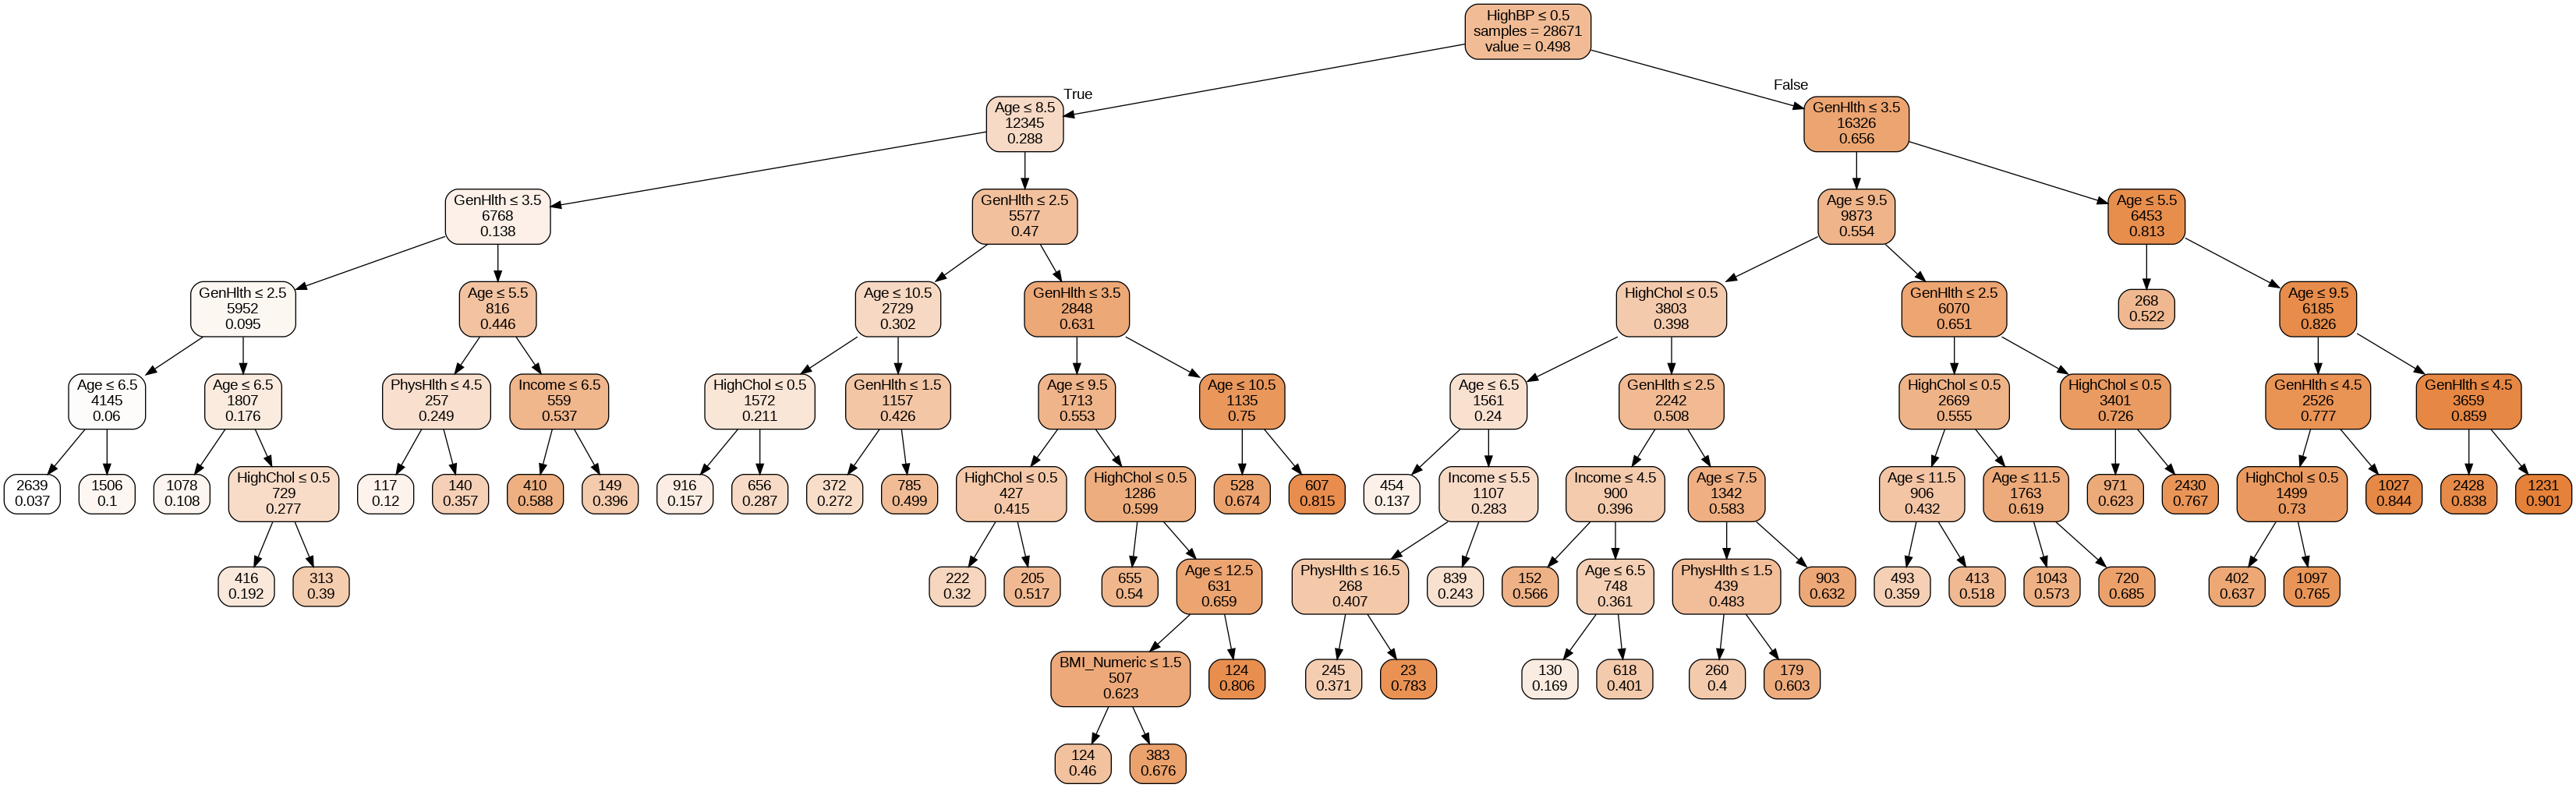

In [92]:
plotDecisionTree(regtree, feature_names=train_X.columns)

In [93]:
model_performance.clear()  # This empties the list but keeps the variable intact
model_performance = []  # This re-creates the list, effectively starting from scratch

models.update({
    "RandomForest": RandomForestClassifier(random_state=1, n_estimators=500),
    "FullClassTree": DecisionTreeClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SmallClassTree": DecisionTreeClassifier(random_state=1, max_depth=2),
    "SmallClassTree3": DecisionTreeClassifier(random_state=1, max_depth=3),
    "SmallClassTree5": DecisionTreeClassifier(random_state=1, max_depth=5, min_impurity_decrease=0.00),
    "GridClassTree": DecisionTreeClassifier(random_state=1, max_depth = 5,
                                       min_impurity_decrease=0.001, min_samples_split= 0.005),
    # Add any more models here
})

Logistic Regression

In [94]:
!pip install dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [95]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc

!pip install mord
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns

!pip install dmba
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9886 sha256=357820977aeabfe99963f73ce4cc96bc7db3d3c74e97c67756670a15878aa58f
  Stored in directory: /root/.cache/pip/wheels/77/00/19/3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord


In [96]:
logit_reg = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, random_state=1, solver='liblinear')

In [97]:
logit_reg.intercept_

array([-5.04454824])

In [98]:
print(len(X.columns), len(logit_reg.coef_[0]))

9 9


In [99]:
coef_df = pd.DataFrame({'variable': X.columns,'coef': logit_reg.coef_[0], 'odds': np.e**logit_reg.coef_[0]}) # Use logit_reg instead of log_reg
coef_df = coef_df.sort_values(by='odds', ascending=False).reset_index(drop=True)
coef_df

,variable,coef,odds
0,HighChol,0.710112,2.034218
1,HighBP,0.636853,1.890523
2,GenHlth,0.618677,1.856470
3,Age,0.284642,1.329286
4,BMI_Numeric,0.046110,1.047190
5,PhysHlth,0.007677,1.007706
6,MentHlth,0.003311,1.003317
7,Education,-0.004561,0.995449
8,Income,-0.048480,0.952676


In [100]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

# Fit the logistic regression model to your training data
log_reg.fit(train_X, train_y)

# Now you can predict probabilities and classes
log_reg_prob = log_reg.predict_proba(valid_X)
log_reg_pred = log_reg.predict(valid_X)

In [101]:
regressionSummary(valid_y, log_reg_pred)


Regression statistics

               Mean Error (ME) : -0.0328
Root Mean Squared Error (RMSE) : 0.4969
     Mean Absolute Error (MAE) : 0.2469


In [102]:
log_result = pd.DataFrame({'actual': valid_y,
                             'p_0': [p[0] for p in log_reg_prob],
                             'p_1': [p[1] for p in log_reg_prob],
                             'predicted': log_reg_pred})
log_result

,actual,p_0,p_1,predicted
30735,0,0.870102,0.129898,0
24072,0,0.389815,0.610185,1
4416,1,0.076180,0.923820,1
34646,0,0.699760,0.300240,0
28703,0,0.459036,0.540964,1
...,...,...,...,...
28762,0,0.465810,0.534190,1
4891,1,0.056289,0.943711,1
14570,1,0.355815,0.644185,1
38156,0,0.542523,0.457477,0


In [103]:
classes = ['With', 'Without']
classificationSummary(log_result.actual, log_result.predicted, class_names=classes)

Confusion Matrix (Accuracy 0.7531)

        Prediction
 Actual    With Without
   With    6814    2673
Without    2046    7582


In [104]:
classes = ['With']
classificationSummary(log_result.actual, log_result.predicted, class_names=classes)

Confusion Matrix (Accuracy 0.7531)

       Prediction
Actual With
  With 6814


In [105]:
model_performance.clear()  # This empties the list but keeps the variable intact
model_performance = []  # This re-creates the list, effectively starting from scratch

models.update({
    "RandomForest": RandomForestClassifier(random_state=1, n_estimators=500),
    "FullClassTree": DecisionTreeClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SmallClassTree": DecisionTreeClassifier(random_state=1, max_depth=2),
    "SmallClassTree3": DecisionTreeClassifier(random_state=1, max_depth=3),
    "SmallClassTree5": DecisionTreeClassifier(random_state=1, max_depth=5, min_impurity_decrease=0.00),
    "GridClassTree": DecisionTreeClassifier(random_state=1, max_depth = 5,
                                       min_impurity_decrease=0.001, min_samples_split= 0.005),
    "LogisticRegression": LogisticRegression(solver='liblinear', C=1e42, random_state=1),
    # Add any more models here
})

In [106]:
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")

    # Fit the model on the training data
    model.fit(train_X, train_y)

    # Make predictions on the validation data
    y_pred = model.predict(valid_X)

    # Handle predictions based on model type
    if hasattr(model, 'predict_proba'):  # Check if the model supports predict_proba
        y_proba = model.predict_proba(valid_X)[:, 1]  # Probability estimates for ROC AUC
        # Convert probabilities to binary predictions for classification metrics
        y_pred_binary = (y_proba > 0.5).astype(int)  # Adjust threshold as needed
        roc_auc = roc_auc_score(valid_y, y_proba)
        accuracy = accuracy_score(valid_y, y_pred_binary)  # Use binary predictions
        recall = recall_score(valid_y, y_pred_binary)
        precision = precision_score(valid_y, y_pred_binary)
        f1 = f1_score(valid_y, y_pred_binary)
    else:
        roc_auc = None  # Or any suitable handling for regression models
        # Use appropriate metrics for regression models, e.g., mean squared error
        # ...

    # Append the metrics to the list
    model_performance.append({
        "Model Name": model_name,
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    })

Evaluating model: RandomForest
Evaluating model: FullClassTree
Evaluating model: DecisionTree
Evaluating model: SmallClassTree
Evaluating model: SmallClassTree3
Evaluating model: SmallClassTree5
Evaluating model: GridClassTree
Evaluating model: LogisticRegression


In [107]:
df_model_performance = pd.DataFrame(model_performance)
print("Updated Model Comparison:")
print(df_model_performance.to_string(index=False))

Updated Model Comparison:
        Model Name  ROC AUC  Accuracy   Recall  Precision  F1 Score
      RandomForest 0.779381  0.718022 0.747819   0.708522  0.727640
     FullClassTree 0.667245  0.659534 0.629310   0.673372  0.650596
      DecisionTree 0.667105  0.659482 0.628376   0.673644  0.650223
    SmallClassTree 0.747896  0.680513 0.749585   0.661321  0.702692
   SmallClassTree3 0.787628  0.729375 0.765268   0.716662  0.740168
   SmallClassTree5 0.813412  0.744546 0.798816   0.723042  0.759043
     GridClassTree 0.807380  0.742506 0.817719   0.713134  0.761854
LogisticRegression 0.824878  0.753126 0.787391   0.739393  0.762638


Gain and Decile Chart

<Axes: title={'center': 'Decile Lift Chart'}, xlabel='Percentile', ylabel='Lift'>

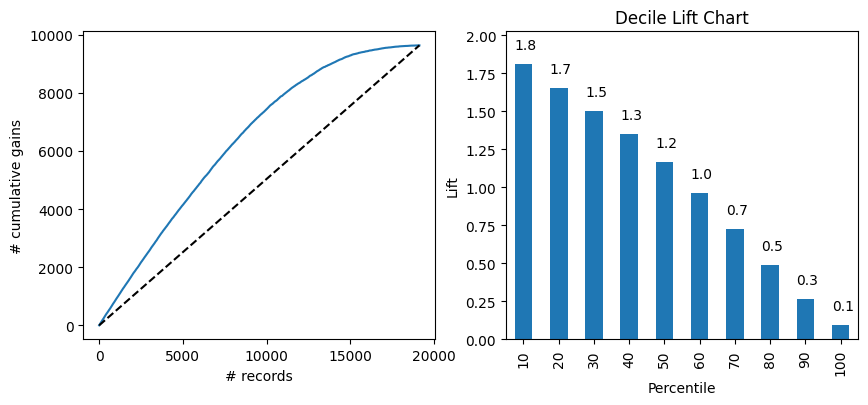

In [108]:
log_result = log_result.sort_values(by='p_1', ascending=False)

# Convert 'actual' column to numeric type before calling gainsChart
log_result['actual'] = log_result['actual'].astype(int)  # Assuming 'actual' should be integers

# Now you can create the gains chart
fig, axes = plt.subplots(1, 2, figsize=(10,4))
gainsChart(log_result.actual, ax=axes[0])
liftChart(log_result['p_1'], ax=axes[1])

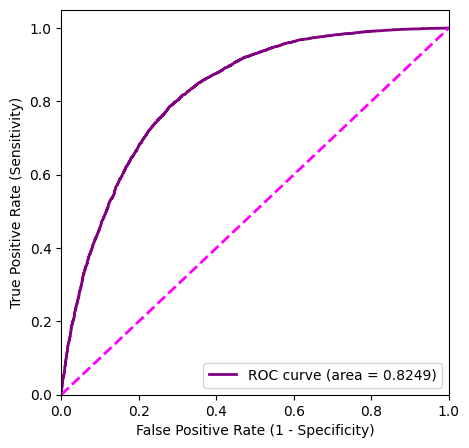

In [109]:
fpr, tpr, _ = roc_curve(log_result['actual'], log_result['p_1'])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=[5, 5])
plt.plot(fpr, tpr, color='purple',
 lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='magenta', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")


Backward Elimination

In [110]:
from sklearn.linear_model import LogisticRegression

def train_model(variables):
    model = LogisticRegression(solver='liblinear', random_state=1)
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict_proba(train_X[variables])[:, 1], model)

best_back_model, best_back_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_back_variables)

Variables: Age, GenHlth, Income, PhysHlth, BMI_Numeric, HighBP, Education, MentHlth, HighChol
Start: score=30068.28
Step: score=30067.89, remove Education
Step: score=30067.89, remove None
['Age', 'GenHlth', 'Income', 'PhysHlth', 'BMI_Numeric', 'HighBP', 'MentHlth', 'HighChol']


In [111]:
regressionSummary(valid_y, best_back_model.predict(valid_X[best_back_variables]))


Regression statistics

               Mean Error (ME) : -0.0324
Root Mean Squared Error (RMSE) : 0.4974
     Mean Absolute Error (MAE) : 0.2474


In [112]:
model_performance.clear()  # This empties the list but keeps the variable intact
model_performance = []  # This re-creates the list, effectively starting from scratch

models.update({
    "RandomForest": RandomForestClassifier(random_state=1, n_estimators=500),
    "FullClassTree": DecisionTreeClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SmallClassTree": DecisionTreeClassifier(random_state=1, max_depth=2),
    "SmallClassTree3": DecisionTreeClassifier(random_state=1, max_depth=3),
    "SmallClassTree5": DecisionTreeClassifier(random_state=1, max_depth=5, min_impurity_decrease=0.00),
    "GridClassTree": DecisionTreeClassifier(random_state=1, max_depth = 5,
                                       min_impurity_decrease=0.001, min_samples_split= 0.005),
    "LogisticRegression": LogisticRegression(solver='liblinear', C=1e42, random_state=1),
    "BackwardElimination": LogisticRegression(solver='liblinear', C=1e42, random_state=1),
    # Add any more models here
})

In [113]:
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")

    # Fit the model on the training data
    model.fit(train_X, train_y)

    # Make predictions on the validation data
    y_pred = model.predict(valid_X)

    # Handle predictions based on model type
    if hasattr(model, 'predict_proba'):  # Check if the model supports predict_proba
        y_proba = model.predict_proba(valid_X)[:, 1]  # Probability estimates for ROC AUC
        # Convert probabilities to binary predictions for classification metrics
        y_pred_binary = (y_proba > 0.5).astype(int)  # Adjust threshold as needed
        roc_auc = roc_auc_score(valid_y, y_proba)
        accuracy = accuracy_score(valid_y, y_pred_binary)  # Use binary predictions
        recall = recall_score(valid_y, y_pred_binary)
        precision = precision_score(valid_y, y_pred_binary)
        f1 = f1_score(valid_y, y_pred_binary)
    else:
        roc_auc = None  # Or any suitable handling for regression models
        # Use appropriate metrics for regression models, e.g., mean squared error
        # ...

    # Append the metrics to the list
    model_performance.append({
        "Model Name": model_name,
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    })

Evaluating model: RandomForest
Evaluating model: FullClassTree
Evaluating model: DecisionTree
Evaluating model: SmallClassTree
Evaluating model: SmallClassTree3
Evaluating model: SmallClassTree5
Evaluating model: GridClassTree
Evaluating model: LogisticRegression
Evaluating model: BackwardElimination


In [114]:
df_model_performance = pd.DataFrame(model_performance)
print("Updated Model Comparison:")
print(df_model_performance.to_string(index=False))

Updated Model Comparison:
         Model Name  ROC AUC  Accuracy   Recall  Precision  F1 Score
       RandomForest 0.779381  0.718022 0.747819   0.708522  0.727640
      FullClassTree 0.667245  0.659534 0.629310   0.673372  0.650596
       DecisionTree 0.667105  0.659482 0.628376   0.673644  0.650223
     SmallClassTree 0.747896  0.680513 0.749585   0.661321  0.702692
    SmallClassTree3 0.787628  0.729375 0.765268   0.716662  0.740168
    SmallClassTree5 0.813412  0.744546 0.798816   0.723042  0.759043
      GridClassTree 0.807380  0.742506 0.817719   0.713134  0.761854
 LogisticRegression 0.824878  0.753126 0.787391   0.739393  0.762638
BackwardElimination 0.824878  0.753126 0.787391   0.739393  0.762638


Forward Selection

In [115]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LogisticRegression(solver='liblinear', random_state=1)
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        # If no variables are selected, predict the probability of the majority class
        majority_class_prob = [train_y.mean()] * len(train_y)
        return AIC_score(train_y, majority_class_prob, model, df=1)
    # Use predicted probabilities for the positive class
    return AIC_score(train_y, model.predict_proba(train_X[variables])[:, 1], model)

best_forw_model, best_forw_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_forw_variables)

Variables: Age, GenHlth, Income, PhysHlth, BMI_Numeric, HighBP, Education, MentHlth, HighChol
Start: score=41621.63, constant
Step: score=36085.19, add GenHlth
Step: score=31688.86, add Age
Step: score=30698.41, add HighChol
Step: score=30177.27, add HighBP
Step: score=30115.50, add Income
Step: score=30085.00, add PhysHlth
Step: score=30069.96, add BMI_Numeric
Step: score=30067.89, add MentHlth
Step: score=30067.89, add None
['GenHlth', 'Age', 'HighChol', 'HighBP', 'Income', 'PhysHlth', 'BMI_Numeric', 'MentHlth']


In [116]:
regressionSummary(valid_y, best_forw_model.predict(valid_X[best_forw_variables]))


Regression statistics

               Mean Error (ME) : -0.0324
Root Mean Squared Error (RMSE) : 0.4974
     Mean Absolute Error (MAE) : 0.2474


Stepwise Selection

In [117]:
from sklearn.linear_model import LogisticRegression

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LogisticRegression(solver='liblinear', random_state=1)
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        # Predict the probability of the majority class when no variables are selected
        majority_class_prob = [train_y.mean()] * len(train_y)
        return AIC_score(train_y, majority_class_prob, model, df=1)
    # Use predicted probabilities for the positive class
    return AIC_score(train_y, model.predict_proba(train_X[variables])[:, 1], model)

best_step_model, best_step_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_step_variables)

Variables: Age, GenHlth, Income, PhysHlth, BMI_Numeric, HighBP, Education, MentHlth, HighChol
Start: score=41621.63, constant
Step: score=36085.19, add GenHlth
Step: score=31688.86, add Age
Step: score=30698.41, add HighChol
Step: score=30177.27, add HighBP
Step: score=30115.50, add Income
Step: score=30085.00, add PhysHlth
Step: score=30069.96, add BMI_Numeric
Step: score=30067.89, add MentHlth
Step: score=30067.89, unchanged None
['GenHlth', 'Age', 'HighChol', 'HighBP', 'Income', 'PhysHlth', 'BMI_Numeric', 'MentHlth']


In [118]:
regressionSummary(valid_y, best_step_model.predict(valid_X[best_step_variables]))


Regression statistics

               Mean Error (ME) : -0.0324
Root Mean Squared Error (RMSE) : 0.4974
     Mean Absolute Error (MAE) : 0.2474


In [119]:
model_performance.clear()  # This empties the list but keeps the variable intact
model_performance = []  # This re-creates the list, effectively starting from scratch

models.update({
    "RandomForest": RandomForestClassifier(random_state=1, n_estimators=500),
    "FullClassTree": DecisionTreeClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SmallClassTree": DecisionTreeClassifier(random_state=1, max_depth=2),
    "SmallClassTree3": DecisionTreeClassifier(random_state=1, max_depth=3),
    "SmallClassTree5": DecisionTreeClassifier(random_state=1, max_depth=5, min_impurity_decrease=0.00),
    "GridClassTree": DecisionTreeClassifier(random_state=1, max_depth = 5,
                                       min_impurity_decrease=0.001, min_samples_split= 0.005),
    "LogisticRegression": LogisticRegression(solver='liblinear', C=1e42, random_state=1),
    "BackwardElimination": LogisticRegression(solver='liblinear', C=1e42, random_state=1),
    "ForwardSelection": LogisticRegression(solver='liblinear', C=1e42, random_state=1),
    "StepwiseSelection:": LogisticRegression(solver='liblinear', C=1e42, random_state=1),
    # Add any more models here
})

In [120]:
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")

    # Fit the model on the training data
    model.fit(train_X, train_y)

    # Make predictions on the validation data
    y_pred = model.predict(valid_X)

    # Handle predictions based on model type
    if hasattr(model, 'predict_proba'):  # Check if the model supports predict_proba
        y_proba = model.predict_proba(valid_X)[:, 1]  # Probability estimates for ROC AUC
        # Convert probabilities to binary predictions for classification metrics
        y_pred_binary = (y_proba > 0.5).astype(int)  # Adjust threshold as needed
        roc_auc = roc_auc_score(valid_y, y_proba)
        accuracy = accuracy_score(valid_y, y_pred_binary)  # Use binary predictions
        recall = recall_score(valid_y, y_pred_binary)
        precision = precision_score(valid_y, y_pred_binary)
        f1 = f1_score(valid_y, y_pred_binary)
    else:
        roc_auc = None  # Or any suitable handling for regression models
        # Use appropriate metrics for regression models, e.g., mean squared error
        # ...

    # Append the metrics to the list
    model_performance.append({
        "Model Name": model_name,
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    })

Evaluating model: RandomForest
Evaluating model: FullClassTree
Evaluating model: DecisionTree
Evaluating model: SmallClassTree
Evaluating model: SmallClassTree3
Evaluating model: SmallClassTree5
Evaluating model: GridClassTree
Evaluating model: LogisticRegression
Evaluating model: BackwardElimination
Evaluating model: ForwardSelection
Evaluating model: StepwiseSelection:


In [121]:
df_model_performance = pd.DataFrame(model_performance)
print("Updated Model Comparison:")
print(df_model_performance.to_string(index=False))

Updated Model Comparison:
         Model Name  ROC AUC  Accuracy   Recall  Precision  F1 Score
       RandomForest 0.779381  0.718022 0.747819   0.708522  0.727640
      FullClassTree 0.667245  0.659534 0.629310   0.673372  0.650596
       DecisionTree 0.667105  0.659482 0.628376   0.673644  0.650223
     SmallClassTree 0.747896  0.680513 0.749585   0.661321  0.702692
    SmallClassTree3 0.787628  0.729375 0.765268   0.716662  0.740168
    SmallClassTree5 0.813412  0.744546 0.798816   0.723042  0.759043
      GridClassTree 0.807380  0.742506 0.817719   0.713134  0.761854
 LogisticRegression 0.824878  0.753126 0.787391   0.739393  0.762638
BackwardElimination 0.824878  0.753126 0.787391   0.739393  0.762638
   ForwardSelection 0.824878  0.753126 0.787391   0.739393  0.762638
 StepwiseSelection: 0.824878  0.753126 0.787391   0.739393  0.762638


Neural Network

In [122]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

!pip install dmba
from dmba import classificationSummary


In [123]:
clf = MLPClassifier(random_state=1, activation='logistic', hidden_layer_sizes=3, solver='lbfgs')
clf.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=3, random_state=1,
              solver='lbfgs')

In [124]:
clf.coefs_

[array([[ 1.19536188e-02, -1.95089952e-01,  5.26543470e-01],
        [-4.56374353e-01, -4.07233643e-01,  5.40107716e-01],
        [-1.01068330e-01,  3.09218101e-02, -3.47049153e-01],
        [-5.91424046e-04, -5.30488540e-03,  6.55507628e-02],
        [ 2.64597502e-01, -9.51642875e-02, -1.37116643e-01],
        [-1.76646579e+00, -1.18042324e-01,  1.56843720e+00],
        [ 2.08403624e-01, -2.56995709e-02, -2.45516748e-01],
        [ 1.73735612e-02, -2.29589239e-03,  5.02152410e-02],
        [-2.13953425e+00, -1.01283598e-01,  1.30050520e+00]]),
 array([[-1.22368418],
        [-4.89920736],
        [ 1.97706476]])]

In [125]:
clf.predict(X)

array([0, 1, 1, ..., 0, 1, 1])

In [126]:
classificationSummary(y,clf.predict(X))

Confusion Matrix (Accuracy 0.7538)

       Prediction
Actual     0     1
     0 16687  7206
     1  4560 19333


In [127]:
clf.predict_proba(X)

array([[0.59186706, 0.40813294],
       [0.18677487, 0.81322513],
       [0.38001206, 0.61998794],
       ...,
       [0.86957599, 0.13042401],
       [0.39706499, 0.60293501],
       [0.32749104, 0.67250896]])

In [128]:
y.head()

,HeartDiseaseorAttack
0,1
1,1
2,1
3,1
4,1


In [129]:
model_performance.clear()  # This empties the list but keeps the variable intact
model_performance = []  # This re-creates the list, effectively starting from scratch

models.update({
    "RandomForest": RandomForestClassifier(random_state=1, n_estimators=500),
    "FullClassTree": DecisionTreeClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SmallClassTree": DecisionTreeClassifier(random_state=1, max_depth=2),
    "SmallClassTree3": DecisionTreeClassifier(random_state=1, max_depth=3),
    "SmallClassTree5": DecisionTreeClassifier(random_state=1, max_depth=5, min_impurity_decrease=0.00),
    "GridClassTree": DecisionTreeClassifier(random_state=1, max_depth = 5,
                                       min_impurity_decrease=0.001, min_samples_split= 0.005),
    "LogisticRegression": LogisticRegression(solver='liblinear', C=1e42, random_state=1),
    "BackwardElimination": LogisticRegression(solver='liblinear', C=1e42, random_state=1),
    "ForwardSelection": LogisticRegression(solver='liblinear', C=1e42, random_state=1),
    "StepwiseSelection:": LogisticRegression(solver='liblinear', C=1e42, random_state=1),
    "Neural Network": MLPClassifier(random_state=1, activation='logistic', hidden_layer_sizes=3, solver='lbfgs'),
    # Add any more models here
})

In [130]:
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")

    # Fit the model on the training data
    model.fit(train_X, train_y)

    # Make predictions on the validation data
    y_pred = model.predict(valid_X)

    # Handle predictions based on model type
    if hasattr(model, 'predict_proba'):  # Check if the model supports predict_proba
        y_proba = model.predict_proba(valid_X)[:, 1]  # Probability estimates for ROC AUC
        # Convert probabilities to binary predictions for classification metrics
        y_pred_binary = (y_proba > 0.5).astype(int)  # Adjust threshold as needed
        roc_auc = roc_auc_score(valid_y, y_proba)
        accuracy = accuracy_score(valid_y, y_pred_binary)  # Use binary predictions
        recall = recall_score(valid_y, y_pred_binary)
        precision = precision_score(valid_y, y_pred_binary)
        f1 = f1_score(valid_y, y_pred_binary)
    else:
        roc_auc = None  # Or any suitable handling for regression models
        # Use appropriate metrics for regression models, e.g., mean squared error
        # ...

    # Append the metrics to the list
    model_performance.append({
        "Model Name": model_name,
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    })

Evaluating model: RandomForest
Evaluating model: FullClassTree
Evaluating model: DecisionTree
Evaluating model: SmallClassTree
Evaluating model: SmallClassTree3
Evaluating model: SmallClassTree5
Evaluating model: GridClassTree
Evaluating model: LogisticRegression
Evaluating model: BackwardElimination
Evaluating model: ForwardSelection
Evaluating model: StepwiseSelection:
Evaluating model: Neural Network


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [131]:
df_model_performance = pd.DataFrame(model_performance)
print("Updated Model Comparison:")
print(df_model_performance.to_string(index=False))

Updated Model Comparison:
         Model Name  ROC AUC  Accuracy   Recall  Precision  F1 Score
       RandomForest 0.779381  0.718022 0.747819   0.708522  0.727640
      FullClassTree 0.667245  0.659534 0.629310   0.673372  0.650596
       DecisionTree 0.667105  0.659482 0.628376   0.673644  0.650223
     SmallClassTree 0.747896  0.680513 0.749585   0.661321  0.702692
    SmallClassTree3 0.787628  0.729375 0.765268   0.716662  0.740168
    SmallClassTree5 0.813412  0.744546 0.798816   0.723042  0.759043
      GridClassTree 0.807380  0.742506 0.817719   0.713134  0.761854
 LogisticRegression 0.824878  0.753126 0.787391   0.739393  0.762638
BackwardElimination 0.824878  0.753126 0.787391   0.739393  0.762638
   ForwardSelection 0.824878  0.753126 0.787391   0.739393  0.762638
 StepwiseSelection: 0.824878  0.753126 0.787391   0.739393  0.762638
     Neural Network 0.825518  0.751975 0.804528   0.730410  0.765680


Neural Network 2

In [132]:
clf=MLPClassifier(random_state=1, activation='logistic', solver='lbfgs', hidden_layer_sizes=2)
clf.fit(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=2, random_state=1,
              solver='lbfgs')

In [133]:
classificationSummary(train_y,clf.predict(train_X))
classificationSummary(valid_y,clf.predict(valid_X))

Confusion Matrix (Accuracy 0.7557)

       Prediction
Actual     0     1
     0 10151  4255
     1  2748 11517
Confusion Matrix (Accuracy 0.7521)

       Prediction
Actual    0    1
     0 6597 2890
     1 1848 7780


In [134]:
clf.predict_proba(valid_X)

array([[0.89356759, 0.10643241],
       [0.37389253, 0.62610747],
       [0.1163504 , 0.8836496 ],
       ...,
       [0.33417294, 0.66582706],
       [0.4885005 , 0.5114995 ],
       [0.21432547, 0.78567453]])

Fitting Class Probabilities

In [135]:
processed=pd.get_dummies(df)
processed.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_Numeric
0,1,1,1,1,0,0,1,1,1,1,0,1,0,2,0,0,0,1,8,6,8,4
1,1,1,1,1,0,0,0,1,1,1,0,1,1,4,2,0,1,0,10,4,7,2
2,1,1,1,1,1,0,0,1,1,1,0,1,0,2,0,7,0,0,11,6,5,1
3,1,1,1,1,1,0,2,0,0,0,0,1,0,5,0,30,1,1,10,6,7,4
4,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,0,1,1,11,5,8,3
